In [18]:
# Automatically reload modules after executing each cell.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
# Pick GPU.
#import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"

#import torch
#from torch import nn
#from torch import optim
#from torch.utils.data import DataLoader

#print(torch.cuda.is_available())
#print(torch.cuda.device_count())
#print(torch.cuda.current_device())
#print(torch.cuda.device(0))
#print(torch.cuda.get_device_name(0))
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#print(device)

#from nflows.flows.base import Flow
#from nflows.distributions.normal import StandardNormal
#from nflows.transforms.base import CompositeTransform
#from nflows.transforms.autoregressive import MaskedAffineAutoregressiveTransform
#from nflows.transforms.permutations import ReversePermutation

# Utility imports
# General imports
import os
import tensorflow as tf
from scipy import stats

# Utility imports
from utils.losses import *
from utils.plotting import *
from utils.training import *

In [20]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0" # pick a number < 4 on ML4HEP; < 3 on Voltan 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Corner Plot

In [21]:
mc = np.load("data/zenodo/Pythia21_Zjet_pTZ-200GeV_0.npz")

sim_pt =  mc['sim_jets'][:, 0]
sim_eta = mc['sim_jets'][:, 1]
sim_phi = mc['sim_jets'][:, 2]
sim_m =   mc['sim_jets'][:, 3]
sim_mults = mc['sim_mults']
sim_lhas = mc['sim_lhas']
sim_widths = mc['sim_widths']
sim_ang2s = mc['sim_ang2s']
sim_tau2s = mc['sim_tau2s']
sim_sdms = mc['sim_sdms']
sim_zgs = mc['sim_zgs']

In [22]:
import seaborn as sns
import pandas as pd

In [23]:
df = pd.DataFrame(data = {'pt': sim_pt, 'eta': sim_eta, 'phi': sim_phi, 
                          'm': sim_m, 'widths': sim_widths, 'sdms': sim_sdms})

In [24]:
sns.pairplot(data = df, kind = 'hist', corner = True)
#plt.savefig('plots/zenodo/corner.pdf')

RuntimeError: Failed to process string with tex because latex could not be found

Error in callback <function _draw_all_if_interactive at 0x7f6e63ecbf40> (for post_execute):


RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 1080x1080 with 21 Axes>

# Training

## BCE $C$ Parametrization

In [9]:
# Experiment parameters
num = 2
reps = 100

# Model parameters
params_1 = {'loss':bce, 'd':6}
params_2 = {'loss':probit_bce, 'd':6, 'output': 'linear'}
params_3 = {'loss':arctan_bce, 'd':6,  'output': 'linear'}

filestr = 'models/zenodo/c_bce/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'probit/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

if not os.path.isdir(filestr):
    os.mkdir(filestr)

if not os.path.isdir(filestr + 'sigmoid/'):
    os.mkdir(filestr + 'sigmoid/')
    
if not os.path.isdir(filestr + 'probit/'):
    os.mkdir(filestr + 'probit/')

if not os.path.isdir(filestr + 'arctan/'):
    os.mkdir(filestr + 'arctan/')

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/6/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/6/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

In [10]:
for i in range(reps):
    print(i, end = ' ')
    model_1, trace = train(data, **params_1)
    model_2, trace = train(data, **params_2)
    model_3, trace = train(data, **params_3)
    print()
    model_1.save_weights(filestr_1.format(i))
    model_2.save_weights(filestr_2.format(i))
    model_3.save_weights(filestr_3.format(i))

0 

2023-11-06 00:54:26.462670: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-06 00:54:27.103375: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 19165 MB memory:  -> device: 0, name: Quadro RTX 6000, pci bus id: 0000:01:00.0, compute capability: 7.5


0.671258807182312 	 100	0.6696333885192871 	 100	0.6705989837646484 	 100	
1 0.6696373820304871 	 100	0.6702251434326172 	 100	0.671057403087616 	 100	
2 0.669964075088501 	 100	0.6710475087165833 	 100	0.6712594628334045 	 100	
3 0.668938398361206 	 100	0.670221209526062 	 100	0.6723390221595764 	 100	
4 0.6716524362564087 	 100	0.6710319519042969 	 100	0.6689433455467224 	 100	
5 0.6707542538642883 	 100	0.6704069375991821 	 100	0.6718525290489197 	 100	
6 0.6714305877685547 	 100	0.6714286208152771 	 100	0.6707636117935181 	 100	
7 0.6712853908538818 	 100	0.6721391081809998 	 100	0.6690713763237 	 100	
8 0.6709175109863281 	 100	0.6724086403846741 	 100	0.6697401404380798 	 100	
9 0.6702324748039246 	 100	0.6695740222930908 	 100	0.6725865006446838 	 100	
10 0.6714321970939636 	 100	0.6702836751937866 	 100	0.6688928604125977 	 100	
11 0.6712750196456909 	 100	0.6707526445388794 	 100	0.6710135340690613 	 100	
12 0.6703806519508362 	 100	0.6714143753051758 	 100	0.6690080165863037 

## MSE $C$ Parametrization

In [11]:
# Experiment parameters
num = 2
reps = 100

# Model parameters
params_1 = {'loss':mse, 'd':6}
params_2 = {'loss':probit_mse, 'd':6, 'output': 'linear'}
params_3 = {'loss':arctan_mse, 'd':6,  'output': 'linear'}

filestr = 'models/zenodo/c_mse/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'probit/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

if not os.path.isdir(filestr):
    os.mkdir(filestr)

if not os.path.isdir(filestr + 'sigmoid/'):
    os.mkdir(filestr + 'sigmoid/')
    
if not os.path.isdir(filestr + 'probit/'):
    os.mkdir(filestr + 'probit/')

if not os.path.isdir(filestr + 'arctan/'):
    os.mkdir(filestr + 'arctan/')

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/6/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/6/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

In [12]:
for i in range(reps):
    print(i, end = ' ')
    model_1, trace = train(data, **params_1)
    model_2, trace = train(data, **params_2)
    model_3, trace = train(data, **params_3)
    print()
    model_1.save_weights(filestr_1.format(i))
    model_2.save_weights(filestr_2.format(i))
    model_3.save_weights(filestr_3.format(i))

0 0.23894734680652618 	 100	0.2384677529335022 	 100	0.23926295340061188 	 100	
1 0.23983459174633026 	 100	0.2381654530763626 	 100	0.23923492431640625 	 100	
2 0.2392270267009735 	 100	0.23868651688098907 	 100	0.2391359955072403 	 100	
3 0.23877154290676117 	 100	0.23921488225460052 	 100	0.24016734957695007 	 100	
4 0.23880669474601746 	 100	0.23991955816745758 	 100	0.23885785043239594 	 100	
5 0.23862794041633606 	 100	0.23984315991401672 	 100	0.23896099627017975 	 100	
6 0.23914600908756256 	 100	0.23851056396961212 	 100	0.23884612321853638 	 100	
7 0.23915447294712067 	 100	0.23930610716342926 	 100	0.23923905193805695 	 100	
8 0.23923712968826294 	 100	0.24023987352848053 	 100	0.2397659420967102 	 100	
9 0.23870190978050232 	 100	0.23907703161239624 	 100	0.23914523422718048 	 100	
10 0.23939083516597748 	 100	0.23892125487327576 	 100	0.2390298992395401 	 100	
11 0.23854491114616394 	 100	0.24008433520793915 	 100	0.23975808918476105 	 100	
12 0.23905110359191895 	 100	0.2

## MLC $C$ Parametrization

In [13]:
# Experiment parameters
num = 2
reps = 100

# Model parameters
params_1 = {'loss':mlc, 'd': 6, 'output': 'relu'}
params_2 = {'loss':square_mlc, 'd': 6, 'output': 'linear'}
params_3 = {'loss':exp_mlc, 'd': 6, 'output': 'linear'}

filestr = 'models/zenodo/c_mlc/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

if not os.path.isdir(filestr):
    os.mkdir(filestr)

if not os.path.isdir(filestr + 'relu/'):
    os.mkdir(filestr + 'relu/')
    
if not os.path.isdir(filestr + 'square/'):
    os.mkdir(filestr + 'square/')

if not os.path.isdir(filestr + 'exponential/'):
    os.mkdir(filestr + 'exponential/')

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/6/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/6/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

In [14]:
for i in range(reps):
    print(i, end = ' ')
    model_1, trace = train(data, **params_1)
    model_2, trace = train(data, **params_2)
    model_3, trace = train(data, **params_3)
    print()
    model_1.save_weights(filestr_1.format(i))
    model_2.save_weights(filestr_2.format(i))
    model_3.save_weights(filestr_3.format(i))

0 -0.018135594204068184 	 100	-0.011926231905817986 	 100	nan 	 61	
1 -0.021954337134957314 	 100	-0.02914680540561676 	 100	nan 	 70	
2 -0.0224476121366024 	 100	-0.014984668232500553 	 100	-0.030352091416716576 	 62	
3 -0.01738281548023224 	 100	-0.014033298939466476 	 100	-0.041068077087402344 	 80	
4 -0.017649944871664047 	 100	0.47844794392585754 	 45	-0.03457764908671379 	 64	
5 -0.021525222808122635 	 100	-0.021855240687727928 	 100	-0.03758670389652252 	 70	
6 -0.019161438569426537 	 100	0.3898318409919739 	 32	nan 	 87	
7 -0.016170140355825424 	 100	-0.02385716326534748 	 100	-0.0376320518553257 	 99	
8 -0.018788166344165802 	 100	-0.0162932351231575 	 100	nan 	 84	
9 -0.015709877014160156 	 100	-0.023727906867861748 	 100	-0.03241001069545746 	 56	
10 -0.01659485511481762 	 100	-0.020891938358545303 	 93	-0.04214881360530853 	 100	
11 -0.017892584204673767 	 100	0.38851967453956604 	 84	-0.03559889271855354 	 73	
12 -0.02751382440328598 	 100	-0.014553429558873177 	 100	-0.03

## SQR $C$ Parametrization

In [31]:
# Experiment parameters
num = 3
reps = 100

# Model parameters
params_1 = {'loss':sqr, 'd': 6, 'output': 'relu'}
params_2 = {'loss':square_sqr, 'd': 6, 'output': 'linear'}
params_3 = {'loss':exp_sqr, 'd': 6, 'output': 'linear'}

filestr = 'models/zenodo/c_sqr/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

if not os.path.isdir(filestr):
    os.mkdir(filestr)

if not os.path.isdir(filestr + 'relu/'):
    os.mkdir(filestr + 'relu/')
    
if not os.path.isdir(filestr + 'square/'):
    os.mkdir(filestr + 'square/')

if not os.path.isdir(filestr + 'exponential/'):
    os.mkdir(filestr + 'exponential/')

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/6/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/6/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

In [32]:
for i in range(reps):
    print(i, end = ' ')
    model_1, trace = train(data, **params_1)
    model_2, trace = train(data, **params_2)
    model_3, trace = train(data, **params_3)
    print()
    model_1.save_weights(filestr_1.format(i))
    model_2.save_weights(filestr_2.format(i))
    model_3.save_weights(filestr_3.format(i))

0 1.0040844678878784 	 100	107.27928924560547 	 11	nan 	 10	
1 0.9999991059303284 	 100	nan 	 10	nan 	 10	
2 

KeyboardInterrupt: 

## $p$-MSE

In [53]:
# Physics
#num = 0    # p* search
#num = 1    # p*
#num = 2     # p*
#num = 3    # p* search
num = 4
reps = 100

# File parameters
filestr = 'models/zenodo/ab_mse/set_{}/'.format(num)
mse_filestr = filestr + 'model_{}.h5'

if not os.path.isdir(filestr):
    os.mkdir(filestr)

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/6/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/6/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)
p_star = 1.92

In [54]:
params = {'loss': get_mse(p_star), 'd': 4}
for i in range(reps):
    print(i, end = '\t')
    model, trace = train(data, **params)
    model.save_weights(mse_filestr.format(i))
    print()

0	0.2584822177886963 	 81	
1	0.25847384333610535 	 100	
2	0.2584572434425354 	 100	
3	0.25845643877983093 	 100	
4	0.25845643877983093 	 97	
5	0.2584584951400757 	 100	
6	0.25849199295043945 	 100	
7	0.2585056722164154 	 79	
8	0.2584872841835022 	 100	
9	0.2584959864616394 	 100	
10	0.2584089934825897 	 100	
11	0.2585340142250061 	 100	
12	0.2585195302963257 	 83	
13	0.25863194465637207 	 97	
14	0.2584682106971741 	 90	
15	0.2584628760814667 	 100	
16	0.2586095631122589 	 72	
17	0.25851964950561523 	 80	
18	0.25857090950012207 	 100	
19	0.25849848985671997 	 84	
20	0.25853657722473145 	 91	
21	0.25850167870521545 	 100	
22	0.2585095465183258 	 78	
23	0.2584724724292755 	 95	
24	0.258541464805603 	 79	
25	0.258373498916626 	 100	
26	0.2584589421749115 	 100	
27	0.25842830538749695 	 100	
28	0.25862568616867065 	 75	
29	0.25850483775138855 	 90	
30	0.25844675302505493 	 93	
31	0.2583170235157013 	 100	
32	0.2585471272468567 	 100	
33	0.25858771800994873 	 100	
34	0.2587240934371948 	 94	

## $r$-SQR

In [55]:
# Physics
#num = 0 (r-SQR search)
#num = 1    # r*
#num = 2     # r*
num = 4
reps = 100

# File parameters
filestr = 'models/zenodo/ab_sqr/set_{}/'.format(num)
sqr_filestr = filestr + 'model_{}.h5'

if not os.path.isdir(filestr):
    os.mkdir(filestr)

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/6/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/6/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

r_star = -0.25

In [56]:
params = {'loss': get_exp_sqr(r_star), 'd': 4, 'output': 'linear'}
for i in range(reps):
    print(i, end = '\t')
    model, trace = train(data, **params)
    model.save_weights(sqr_filestr.format(i))
    print()

0	0.9889824390411377 	 100	
1	0.9890187382698059 	 100	
2	0.9889730215072632 	 100	
3	0.9890350699424744 	 100	
4	0.9889503717422485 	 100	
5	0.9889467358589172 	 100	
6	0.9890879392623901 	 100	
7	0.98903489112854 	 100	
8	0.9889870285987854 	 100	
9	0.9889166951179504 	 100	
10	0.9888890385627747 	 100	
11	0.9890771508216858 	 100	
12	0.9889781475067139 	 100	
13	0.989056408405304 	 100	
14	0.9890078902244568 	 100	
15	0.9888905882835388 	 100	
16	0.9888085722923279 	 100	
17	0.9889366030693054 	 100	
18	0.9889494776725769 	 100	
19	0.9889892339706421 	 100	
20	0.9888144731521606 	 100	
21	0.9889736771583557 	 100	
22	0.9889631867408752 	 100	
23	0.9889138340950012 	 100	
24	0.9888993501663208 	 100	
25	0.9890283346176147 	 100	
26	0.9890933036804199 	 100	
27	0.9888936281204224 	 100	
28	0.9890015721321106 	 94	
29	0.9889786839485168 	 100	
30	0.9889824986457825 	 100	
31	0.9889824986457825 	 100	
32	0.98896324634552 	 100	
33	0.988975465297699 	 100	
34	0.9888792037963867 	 100	
35

# MAEs

In [21]:
d = 6

num_layers = 5

# DATA FLOW
base_dist = StandardNormal(shape=[d])
transforms = []
for _ in range(num_layers):
    transforms.append(ReversePermutation(features=d))
    transforms.append(MaskedAffineAutoregressiveTransform(features=d, 
                                                          hidden_features=8))
transform = CompositeTransform(transforms)
dt_flow = Flow(transform, base_dist)
dt_flow.to(device)
ckpt = torch.load('flows/nflows/dat/6/best/ckpt_19')
dt_flow.load_state_dict(ckpt['model_state_dict'])
dt_flow.eval()

# MC FLOW
base_dist = StandardNormal(shape=[d])
transforms = []
for _ in range(num_layers):
    transforms.append(ReversePermutation(features=d))
    transforms.append(MaskedAffineAutoregressiveTransform(features=d, 
                                                          hidden_features=8))
transform = CompositeTransform(transforms)
mc_flow = Flow(transform, base_dist)
mc_flow.to(device)
ckpt = torch.load('flows/nflows/sim/6/best/ckpt_50')
mc_flow.load_state_dict(ckpt['model_state_dict'])
mc_flow.eval();

NameError: name 'StandardNormal' is not defined

In [6]:
X_mae = np.load('data/zenodo/fold/6/X_tst.npy')
lr_tst = np.load('data/zenodo/fold/6/lr_tst.npy')

In [7]:
def mae(model_lr):
    abs_dif = abs(model_lr(X_mae) - lr_tst)
    #print(np.mean(abs_dif < 100), end = ' ')
    return abs_dif[abs_dif < 100].mean()

## BCE

In [64]:
# Experiment parameters
num = 2
reps = 100

# Model parameters
params_1 = {'loss':bce, 'd':6}
params_2 = {'loss':probit_bce, 'd':6, 'output': 'linear'}
params_3 = {'loss':arctan_bce, 'd':6,  'output': 'linear'}

filestr = 'models/zenodo/c_bce/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'probit/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/6/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/6/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

In [65]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = odds_lr(model_1, m, s)
    lrs_2[i] = probit_lr(model_2, m, s)
    lrs_3[i] = arctan_lr(model_3, m, s)

# Calculate mean absolute errors
maes_1 = [mae(lr) for lr in lrs_1]
maes_2 = [mae(lr) for lr in lrs_2]
maes_3 = [mae(lr) for lr in lrs_3]

avg_1 = np.mean(maes_1)
avg_2 = np.mean(maes_2)
avg_3 = np.mean(maes_3, where = ~np.isnan(maes_3))

std_1 = np.std(maes_1, ddof = 1)
std_2 = np.std(maes_2, ddof = 1)
std_3 = np.std(maes_3, ddof = 1)

abs_dif_1 = np.array([abs(lr(X_mae) - lr_tst) for lr in lrs_1])
abs_dif_2 = np.array([abs(lr(X_mae) - lr_tst) for lr in lrs_2])
abs_dif_3 = np.array([abs(lr(X_mae) - lr_tst) for lr in lrs_3])

# Save results
np.save(filestr + 'maes_1.npy', maes_1)
np.save(filestr + 'maes_2.npy', maes_2)
np.save(filestr + 'maes_3.npy', maes_3)

np.save(filestr + 'avg_1.npy', avg_1)
np.save(filestr + 'avg_2.npy', avg_2)
np.save(filestr + 'avg_3.npy', avg_3)

np.save(filestr + 'std_1.npy', std_1)
np.save(filestr + 'std_2.npy', std_2)
np.save(filestr + 'std_3.npy', std_3)

np.save(filestr + 'abs_dif_1.npy', abs_dif_1)
np.save(filestr + 'abs_dif_2.npy', abs_dif_2)
np.save(filestr + 'abs_dif_3.npy', abs_dif_3)

print(avg_1, avg_2, avg_3)
print(std_1, std_2, std_3)

/clusterfs/ml4hep/shahzar/reweighting-schemes/utils/training.py:187: RuntimeWarning: divide by zero encountered in divide
  return np.squeeze(f / (1. - f))
/tmp/ipykernel_16626/3780721232.py:2: RuntimeWarning: invalid value encountered in subtract
  abs_dif = abs(model_lr(X_mae) - lr_tst)


/tmp/ipykernel_16626/1996259824.py:31: RuntimeWarning: invalid value encountered in subtract
  abs_dif_1 = np.array([abs(lr(X_mae) - lr_tst) for lr in lrs_1])
/tmp/ipykernel_16626/1996259824.py:32: RuntimeWarning: invalid value encountered in subtract
  abs_dif_2 = np.array([abs(lr(X_mae) - lr_tst) for lr in lrs_2])


0.5058717 0.50910306 0.50965285
0.007088754 0.0096205715 0.008900229


In [66]:
abs_dif_1 = np.load(filestr + 'abs_dif_1.npy')
(abs_dif_1 > 100).mean()

0.0040668

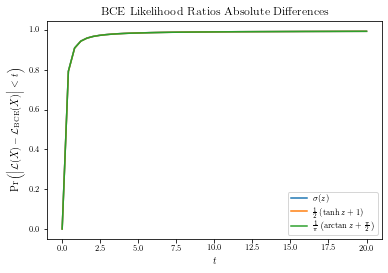

In [67]:
aa = abs_dif_1.flatten()
bb = abs_dif_2.flatten()
cc = abs_dif_3.flatten()

ts = np.linspace(0, 20)
plt.plot(ts, [(aa < t).mean() for t in ts], label = r'$\sigma(z)$')
plt.plot(ts, [(bb < t).mean() for t in ts], label = r'$\frac{1}{2}\left(\tanh{z} + 1\right)$')
plt.plot(ts, [(cc < t).mean() for t in ts], label = r'$\frac{1}{\pi}\left(\arctan{z} + \frac{\pi}{2}\right)$')
plt.legend()

plt.xlabel(r'$t$')
plt.ylabel(r'$\text{Pr}\left(\Big|\mathcal{L}(X) - \mathcal{L}_\text{BCE}(X)\Big| < t\right)$')
plt.title(r'BCE Likelihood Ratios Absolute Differences')

plt.savefig('plots/zenodo/bce_threshold_plot.png', 
            dpi=300, 
            bbox_inches='tight')

## MSE

In [68]:
# Experiment parameters
num = 2
reps = 100

# Model parameters
params_1 = {'loss':mse, 'd':6}
params_2 = {'loss':probit_mse, 'd':6, 'output': 'linear'}
params_3 = {'loss':arctan_mse, 'd':6,  'output': 'linear'}

filestr = 'models/zenodo/c_mse/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'probit/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/6/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/6/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

In [69]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = odds_lr(model_1, m, s)
    lrs_2[i] = probit_lr(model_2, m, s)
    lrs_3[i] = arctan_lr(model_3, m, s)

# Calculate mean absolute errors
maes_1 = [mae(lr) for lr in lrs_1]
maes_2 = [mae(lr) for lr in lrs_2]
maes_3 = [mae(lr) for lr in lrs_3]

avg_1 = np.mean(maes_1)
avg_2 = np.mean(maes_2)
avg_3 = np.mean(maes_3, where = ~np.isnan(maes_3))

std_1 = np.std(maes_1, ddof = 1)
std_2 = np.std(maes_2, ddof = 1)
std_3 = np.std(maes_3, ddof = 1)

abs_dif_1 = np.array([abs(lr(X_mae) - lr_tst) for lr in lrs_1])
abs_dif_2 = np.array([abs(lr(X_mae) - lr_tst) for lr in lrs_2])
abs_dif_3 = np.array([abs(lr(X_mae) - lr_tst) for lr in lrs_3])

# Save results
np.save(filestr + 'maes_1.npy', maes_1)
np.save(filestr + 'maes_2.npy', maes_2)
np.save(filestr + 'maes_3.npy', maes_3)

np.save(filestr + 'avg_1.npy', avg_1)
np.save(filestr + 'avg_2.npy', avg_2)
np.save(filestr + 'avg_3.npy', avg_3)

np.save(filestr + 'std_1.npy', std_1)
np.save(filestr + 'std_2.npy', std_2)
np.save(filestr + 'std_3.npy', std_3)

np.save(filestr + 'abs_dif_1.npy', abs_dif_1)
np.save(filestr + 'abs_dif_2.npy', abs_dif_2)
np.save(filestr + 'abs_dif_3.npy', abs_dif_3)

print(avg_1, avg_2, avg_3)
print(std_1, std_2, std_3)

/clusterfs/ml4hep/shahzar/reweighting-schemes/utils/training.py:187: RuntimeWarning: divide by zero encountered in divide
  return np.squeeze(f / (1. - f))
/tmp/ipykernel_16626/3780721232.py:2: RuntimeWarning: invalid value encountered in subtract
  abs_dif = abs(model_lr(X_mae) - lr_tst)
/tmp/ipykernel_16626/1996259824.py:31: RuntimeWarning: invalid value encountered in subtract
  abs_dif_1 = np.array([abs(lr(X_mae) - lr_tst) for lr in lrs_1])
/tmp/ipykernel_16626/1996259824.py:32: RuntimeWarning: invalid value encountered in subtract
  abs_dif_2 = np.array([abs(lr(X_mae) - lr_tst) for lr in lrs_2])


0.50548303 0.50808835 0.5081739
0.00729145 0.010038669 0.0077995383


In [70]:
abs_dif_1 = np.load(filestr + 'abs_dif_1.npy')
(abs_dif_1 > 100).mean()

0.0040939

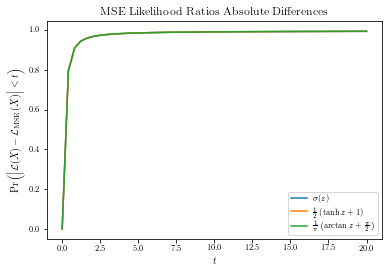

In [71]:
aa = abs_dif_1.flatten()
bb = abs_dif_2.flatten()
cc = abs_dif_3.flatten()

ts = np.linspace(0, 20)
plt.plot(ts, [(aa < t).mean() for t in ts], label = r'$\sigma(z)$')
plt.plot(ts, [(bb < t).mean() for t in ts], label = r'$\frac{1}{2}\left(\tanh{z} + 1\right)$')
plt.plot(ts, [(cc < t).mean() for t in ts], label = r'$\frac{1}{\pi}\left(\arctan{z} + \frac{\pi}{2}\right)$')
plt.legend()

plt.xlabel(r'$t$')
plt.ylabel(r'$\text{Pr}\left(\Big|\mathcal{L}(X) - \mathcal{L}_\text{MSE}(X)\Big| < t\right)$')
plt.title(r'MSE Likelihood Ratios Absolute Differences')

plt.savefig('plots/zenodo/mse_threshold_plot.png', 
            dpi=300, 
            bbox_inches='tight')

## MLC

In [72]:
# Experiment parameters
num = 2
reps = 100

# Model parameters
params_1 = {'loss':mlc, 'd': 6, 'output': 'relu'}
params_2 = {'loss':square_mlc, 'd': 6, 'output': 'linear'}
params_3 = {'loss':exp_mlc, 'd': 6, 'output': 'linear'}

filestr = 'models/zenodo/c_mlc/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/6/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/6/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

In [73]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = pure_lr(model_1, m, s)
    lrs_2[i] = square_lr(model_2, m, s)
    lrs_3[i] = exp_lr(model_3, m, s)

# Calculate mean absolute errors
maes_1 = [mae(lr) for lr in lrs_1]
maes_2 = [mae(lr) for lr in lrs_2]
maes_3 = [mae(lr) for lr in lrs_3]

avg_1 = np.mean(maes_1)
avg_2 = np.mean(maes_2)
avg_3 = np.mean(maes_3, where = ~np.isnan(maes_3))

std_1 = np.std(maes_1, ddof = 1)
std_2 = np.std(maes_2, ddof = 1)
std_3 = np.std(maes_3, ddof = 1)

abs_dif_1 = np.array([abs(lr(X_mae) - lr_tst) for lr in lrs_1])
abs_dif_2 = np.array([abs(lr(X_mae) - lr_tst) for lr in lrs_2])
abs_dif_3 = np.array([abs(lr(X_mae) - lr_tst) for lr in lrs_3])

# Save results
np.save(filestr + 'maes_1.npy', maes_1)
np.save(filestr + 'maes_2.npy', maes_2)
np.save(filestr + 'maes_3.npy', maes_3)

np.save(filestr + 'avg_1.npy', avg_1)
np.save(filestr + 'avg_2.npy', avg_2)
np.save(filestr + 'avg_3.npy', avg_3)

np.save(filestr + 'std_1.npy', std_1)
np.save(filestr + 'std_2.npy', std_2)
np.save(filestr + 'std_3.npy', std_3)

np.save(filestr + 'abs_dif_1.npy', abs_dif_1)
np.save(filestr + 'abs_dif_2.npy', abs_dif_2)
np.save(filestr + 'abs_dif_3.npy', abs_dif_3)

print(avg_1, avg_2, avg_3)
print(std_1, std_2, std_3)

/tmp/ipykernel_16626/3780721232.py:4: RuntimeWarning: Mean of empty slice.
  return abs_dif[abs_dif < 100].mean()
/clusterfs/ml4hep/shahzar/miniconda/envs/multifold/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


0.6130182 0.66564214 0.5507566
0.009426319 0.12945494 nan


In [74]:
abs_dif_3 = np.load(filestr + 'abs_dif_3.npy')
(abs_dif_3 > 100).mean()

0.0039319

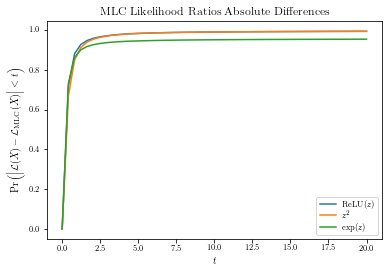

In [75]:
aa = abs_dif_1.flatten()
bb = abs_dif_2.flatten()
cc = abs_dif_3.flatten()

ts = np.linspace(0, 20)
plt.plot(ts, [(aa < t).mean() for t in ts], label = r'${\rm ReLU}(z)$')
plt.plot(ts, [(bb < t).mean() for t in ts], label = r'$z^2$')
plt.plot(ts, [(cc < t).mean() for t in ts], label = r'$\exp(z)$')
plt.legend()

plt.xlabel(r'$t$')
plt.ylabel(r'$\text{Pr}\left(\Big|\mathcal{L}(X) - \mathcal{L}_\text{MLC}(X)\Big| < t\right)$')
plt.title(r'MLC Likelihood Ratios Absolute Differences')

plt.savefig('plots/zenodo/mlc_threshold_plot.png', 
            dpi=300, 
            bbox_inches='tight')

## SQR

In [76]:
# Experiment parameters
num = 2
reps = 100

# Model parameters
params_1 = {'loss':sqr, 'd': 6, 'output': 'relu'}
params_2 = {'loss':square_sqr, 'd': 6, 'output': 'linear'}
params_3 = {'loss':exp_sqr, 'd': 6, 'output': 'linear'}

filestr = 'models/zenodo/c_sqr/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/6/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/6/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

In [77]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = pure_lr(model_1, m, s)
    lrs_2[i] = square_lr(model_2, m, s)
    lrs_3[i] = exp_lr(model_3, m, s)

# Calculate mean absolute errors
maes_1 = [mae(lr) for lr in lrs_1]
maes_2 = [mae(lr) for lr in lrs_2]
maes_3 = [mae(lr) for lr in lrs_3]

avg_1 = np.mean(maes_1)
avg_2 = np.mean(maes_2, where = ~np.isnan(maes_2))
avg_3 = np.mean(maes_3, where = ~np.isnan(maes_3))

std_1 = np.std(maes_1, ddof = 1)
std_2 = np.std(maes_2, ddof = 1, where = ~np.isnan(maes_2))
std_3 = np.std(maes_3, ddof = 1)

abs_dif_1 = np.array([abs(lr(X_mae) - lr_tst) for lr in lrs_1])
abs_dif_2 = np.array([abs(lr(X_mae) - lr_tst) for lr in lrs_2])
abs_dif_3 = np.array([abs(lr(X_mae) - lr_tst) for lr in lrs_3])

# Save results
np.save(filestr + 'maes_1.npy', maes_1)
np.save(filestr + 'maes_2.npy', maes_2)
np.save(filestr + 'maes_3.npy', maes_3)

np.save(filestr + 'avg_1.npy', avg_1)
np.save(filestr + 'avg_2.npy', avg_2)
np.save(filestr + 'avg_3.npy', avg_3)

np.save(filestr + 'std_1.npy', std_1)
np.save(filestr + 'std_2.npy', std_2)
np.save(filestr + 'std_3.npy', std_3)

np.save(filestr + 'abs_dif_1.npy', abs_dif_1)
np.save(filestr + 'abs_dif_2.npy', abs_dif_2)
np.save(filestr + 'abs_dif_3.npy', abs_dif_3)

print(avg_1, avg_2, avg_3)
print(std_1, std_2, std_3)

0.68091726 1.0971719 0.52239853
0.040944885 0.1414669 0.009277418


In [78]:
abs_dif_3 = np.load(filestr + 'abs_dif_3.npy')
(abs_dif_3 > 100).mean()

0.0040906

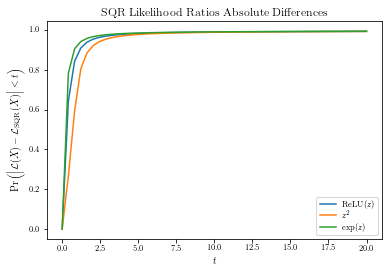

In [79]:
aa = abs_dif_1.flatten()
bb = abs_dif_2.flatten()
cc = abs_dif_3.flatten()

ts = np.linspace(0, 20)
plt.plot(ts, [(aa < t).mean() for t in ts], label = r'${\rm ReLU}(z)$')
plt.plot(ts, [(bb < t).mean() for t in ts], label = r'$z^2$')
plt.plot(ts, [(cc < t).mean() for t in ts], label = r'$\exp(z)$')
plt.legend()

plt.xlabel(r'$t$')
plt.ylabel(r'$\text{Pr}\left(\Big|\mathcal{L}(X) - \mathcal{L}_\text{SQR}(X)\Big| < t\right)$')
plt.title(r'SQR Likelihood Ratios Absolute Differences')

plt.savefig('plots/zenodo/sqr_threshold_plot.png', 
            dpi=300, 
            bbox_inches='tight')

## AB MSE

In [5]:
# Experiment parameters
num = 6
reps = 20

# File parameters
filestr = 'models/zenodo/ab_mse/set_{}/'.format(num)
mse_filestr = filestr + 'model_{}_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/6/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/6/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

#ps = np.round(np.append(np.linspace(-2, 2, 101)[:-1], 
#                        np.linspace(2, 3, 101)), 
#              2)
ps = np.round(np.linspace(-2, 3, 126), 2)

In [9]:
# Get model likelihood ratios.
avgs = []
for p in ps:
    print(p, end = '\t')
    lrs = [None] * reps
    params = {'loss':get_mse(p), 'd': 6}
    for i in range(reps):
        model = create_model(**params)
        model.load_weights(mse_filestr.format(p, i))
        lrs[i] = pow_odds_lr(model, p, m, s)
    
    maes = [mae(lr) for lr in lrs]
    avgs += [np.nanmean(maes)]
    print(avgs[-1])

avgs = np.array(avgs)

-2.0	

2023-12-08 03:57:19.518265: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-08 03:57:20.173180: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14604 MB memory:  -> device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:1a:00.0, compute capability: 7.0


0.48129338
-1.96	0.48538765
-1.92	0.4825088
-1.88	0.4795502
-1.84	0.47858262
-1.8	0.47827435
-1.76	0.48097983
-1.72	0.48028392
-1.68	0.47976536
-1.64	0.48057127
-1.6	0.47896916
-1.56	0.47802362
-1.52	0.4770419
-1.48	0.47820836
-1.44	0.47793478
-1.4	0.47804102
-1.36	0.47636533
-1.32	0.4763042
-1.28	0.47745633
-1.24	0.47490078
-1.2	0.47492272
-1.16	0.47106862
-1.12	0.47603065
-1.08	0.47584152
-1.04	0.47477412
-1.0	0.47353116
-0.96	0.47443128
-0.92	0.4725911
-0.88	0.47378534
-0.84	0.4740251
-0.8	0.47583014
-0.76	0.47309962
-0.72	0.47436196
-0.68	0.4732011
-0.64	0.47411084
-0.6	0.47402272
-0.56	0.47204867
-0.52	0.47022676
-0.48	0.47097844
-0.44	0.47016352
-0.4	0.4714771
-0.36	0.47016114
-0.32	0.46989447
-0.28	0.4709235
-0.24	0.474423
-0.2	0.47139826
-0.16	0.47130466
-0.12	0.47118074
-0.08	0.4700502
-0.04	0.4719583
0.0	0.61402404
0.04	

/clusterfs/ml4hep/shahzar/reweighting-schemes/utils/training.py:236: RuntimeWarning: divide by zero encountered in divide
  return np.squeeze( (f / (1. - f))**(p - 1))
/clusterfs/ml4hep/shahzar/reweighting-schemes/utils/training.py:236: RuntimeWarning: divide by zero encountered in power
  return np.squeeze( (f / (1. - f))**(p - 1))
/tmp/ipykernel_2994917/3780721232.py:2: RuntimeWarning: invalid value encountered in subtract
  abs_dif = abs(model_lr(X_mae) - lr_tst)
/tmp/ipykernel_2994917/3780721232.py:4: RuntimeWarning: Mean of empty slice.
  return abs_dif[abs_dif < 100].mean()
/clusterfs/ml4hep/shahzar/miniconda/envs/multifold/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


1.2983596
0.08	1.4176983
0.12	1.4868991
0.16	1.4531546
0.2	1.475645
0.24	1.4419913
0.28	1.5221223
0.32	1.5006496
0.36	1.6045042
0.4	1.7340004
0.44	1.6875654
0.48	1.6215514
0.52	1.708117
0.56	1.8786714
0.6	6.3461056
0.64	6.0436764
0.68	2.2255778
0.72	5.9186583
0.76	3.9198303
0.8	5.224404
0.84	7.467841
0.88	10.154812
0.92	8.453567
0.96	1.5727605
1.0	0.57734525
1.04	0.48515978
1.08	0.4873159
1.12	0.48172674
1.16	0.47899047
1.2	0.4773584
1.24	0.4757421
1.28	0.4744462
1.32	0.47217408
1.36	0.4716521
1.4	0.47200584
1.44	0.4706556
1.48	0.4698909
1.52	0.46919456
1.56	0.47052807
1.6	0.46928865
1.64	0.46875268
1.68	0.46907467
1.72	0.4691823
1.76	0.46967036
1.8	0.4699498
1.84	0.4690176
1.88	0.46892166
1.92	0.46994537
1.96	0.46994853
2.0	0.4702591
2.04	0.46909636
2.08	0.46973372
2.12	0.46944666
2.16	0.47028333
2.2	0.4700223
2.24	0.47054178
2.28	0.46955866
2.32	0.4702777
2.36	0.47210234
2.4	0.47015905
2.44	0.47026
2.48	0.46982846
2.52	0.4699398
2.56	0.47206992
2.6	0.47054505
2.64	0.47240385
2.68	0.4

In [10]:
# Save results
np.save(filestr + 'avgs', avgs)

In [7]:
avgs = np.load(filestr + 'avgs.npy')
#avgs_2 = np.load(filestr + 'avgs_2.npy')

In [22]:
#avgs = np.append(avgs, avgs_2[1:])
#ps = np.append(np.linspace(-2, 2, 101), np.linspace(2, 3, 101)[1:])

In [8]:
ps[avgs == np.nanmin(avgs)]

array([1.64])

In [24]:
# Expand scan

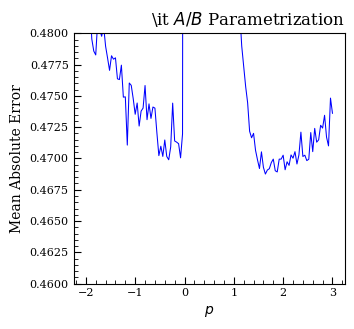

In [22]:
w = 3.5
h = 3.25              # Plots have dimension (w,h)

plt.figure(figsize = (w, h))

plt.plot(ps, avgs, c='blue', lw = 0.75)

plt.minorticks_on()
plt.tick_params(which = 'minor', length = 3)
plt.tick_params(which = 'major', length = 5)
plt.tick_params(which = 'both', direction='in')
plt.ylabel('Mean Absolute Error')
plt.xlabel(r'$p$')
plt.ylim(0.46, 0.48)

plt.title(r"\it $A/B$ Parametrization",loc="right");
plt.savefig('plots/zenodo/ab_mse_6.pdf', 
            dpi=300, 
            bbox_inches='tight')

## AB SQR

In [15]:
# Experiment parameters
num = 6
reps = 20

# File parameters
filestr = 'models/zenodo/ab_sqr/set_{}/'.format(num)
lin_filestr = filestr + 'relu/model_{}_{}.h5'
exp_filestr = filestr + 'exponential/model_{}_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/6/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/6/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

rs = np.sort(np.append(np.round(np.linspace(-2, 2, 81), 2),
                       np.round(np.linspace(-0.05, 0.05, 26), 3)[1:-1]))

In [14]:
lin_avgs = []
exp_avgs = []

for r in rs:
    print(r, end = '\t')
    lin_lrs = [None] * reps
    exp_lrs = [None] * reps
    lin_params = {'loss': get_sqr(r), 'd': 6, 'output':'relu'}
    exp_params = {'loss': get_exp_sqr(r), 'd': 6, 'output':'linear'}
    
    for i in range(reps):
        lin_model = create_model(**lin_params)
        exp_model = create_model(**exp_params)
        
        lin_model.load_weights(lin_filestr.format(r, i))
        exp_model.load_weights(exp_filestr.format(r, i))
        
        lin_lrs[i] = pow_lr(lin_model, r, m, s)
        exp_lrs[i] = pow_exp_lr(exp_model, r, m, s)
    
    lin_maes = [mae(lr) for lr in lin_lrs]
    exp_maes = [mae(lr) for lr in exp_lrs]
    
    lin_avgs += [np.nanmean(lin_maes)]
    exp_avgs += [np.nanmean(exp_maes)]

-2.0	-1.95	-1.9	-1.85	-1.8	-1.75	-1.7	-1.65	-1.6	-1.55	-1.5	-1.45	-1.4	-1.35	-1.3	-1.25	-1.2	-1.15	-1.1	-1.05	-1.0	-0.95	-0.9	-0.85	-0.8	-0.75	-0.7	-0.65	-0.6	-0.55	

/clusterfs/ml4hep/shahzar/reweighting-schemes/utils/training.py:224: RuntimeWarning: divide by zero encountered in power
  return np.squeeze(f**p)


-0.5	-0.45	-0.4	-0.35	-0.3	-0.25	-0.2	-0.15	-0.1	

/tmp/ipykernel_2994917/3780721232.py:4: RuntimeWarning: Mean of empty slice.
  return abs_dif[abs_dif < 100].mean()


-0.05	-0.046	-0.042	-0.038	

/tmp/ipykernel_2994917/3780721232.py:2: RuntimeWarning: invalid value encountered in subtract
  abs_dif = abs(model_lr(X_mae) - lr_tst)


-0.034	-0.03	-0.026	-0.022	-0.018	-0.014	-0.01	-0.006	-0.002	0.0	0.002	

/clusterfs/ml4hep/shahzar/reweighting-schemes/utils/training.py:230: RuntimeWarning: overflow encountered in exp
  return np.squeeze(np.exp(f)**p)


0.006	0.01	0.014	0.018	0.022	0.026	0.03	0.034	0.038	0.042	0.046	0.05	0.1	0.15	0.2	0.25	0.3	0.35	0.4	0.45	0.5	0.55	0.6	0.65	0.7	0.75	0.8	0.85	0.9	0.95	1.0	1.05	1.1	1.15	1.2	1.25	1.3	1.35	1.4	1.45	1.5	1.55	1.6	1.65	1.7	1.75	1.8	1.85	1.9	1.95	2.0	

In [15]:
# Save results
lin_avgs = np.array(lin_avgs)
exp_avgs = np.array(exp_avgs)

np.save(filestr + 'lin_avgs', lin_avgs)
np.save(filestr + 'exp_avgs', exp_avgs)

In [17]:
lin_avgs = np.load(filestr + 'lin_avgs.npy')
exp_avgs = np.load(filestr + 'exp_avgs.npy')

rs[lin_avgs == np.nanmin(lin_avgs)], rs[exp_avgs == np.nanmin(exp_avgs)]

(array([-0.002]), array([1.1]))

In [18]:
from matplotlib import rc
rc('text', usetex=False)

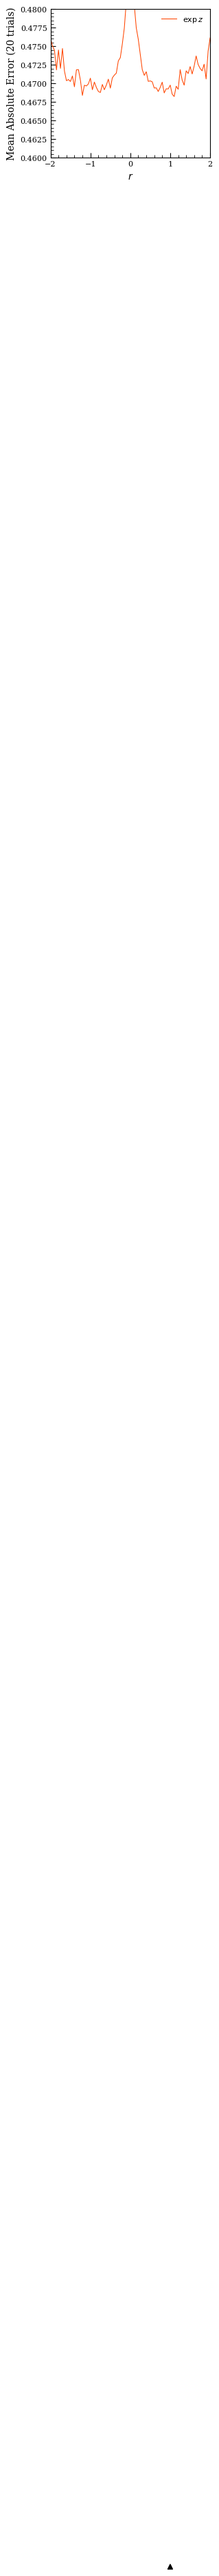

In [20]:
w = 3
h = 2.8

plt.figure(figsize = (w, h))

plt.plot(rs, exp_avgs, label=r'$\exp{z}$', c='orangered', lw = 0.75)
plt.legend(frameon = False)

plt.minorticks_on()
plt.tick_params(which = 'minor', length = 3)
plt.tick_params(which = 'major', length = 5)
plt.tick_params(which = 'both', direction='in')
plt.ylabel('Mean Absolute Error (20 trials)')
plt.xlabel(r'$r$')
plt.ylim(0.46, 0.48)
plt.xlim(-2, 2)
plt.gca().annotate(' ', (1.0, 0.14 - 0.0045), 
                   arrowprops = dict(color = 'k', headlength = 5, headwidth = 5),
                   annotation_clip = False)

#plt.title(r"\it $r$-SQR Losses for Physics Data", loc="right");
plt.savefig('plots/zenodo/rsqr_physics_6.pdf', 
            dpi=300, 
            bbox_inches='tight')

## $p^*$-MSE

In [61]:
# Physics
#num = 0    # p* search
num = 2    # p*
reps = 100

# File parameters
filestr = 'models/zenodo/ab_mse/set_{}/'.format(num)
mse_filestr = filestr + 'model_{}.h5'

if not os.path.isdir(filestr):
    os.mkdir(filestr)

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)
p_star = 1.92

In [62]:
lrs = [None] * reps
params = {'loss':get_mse(p_star), 'd': 4}

for i in range(reps):
    print(i, end = '\t')
    model = create_model(**params)
    model.load_weights(mse_filestr.format(i))
    lrs[i] = pow_odds_lr(model, p_star, m, s)

# Calculate mean absolute errors
maes = np.array([mae(lr) for lr in lrs])

# Save results
np.save(filestr + 'maes.npy', maes)
print(np.mean(maes), np.std(maes, ddof = 1) / 10)

0	1	2	3	4	5	6	7	8	9	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	26	27	28	29	30	31	32	33	34	35	36	37	38	39	40	41	42	43	44	45	46	47	48	49	50	51	52	53	54	55	56	57	58	59	60	61	62	63	64	65	66	67	68	69	70	71	72	73	74	75	76	77	78	79	80	81	82	83	84	85	86	87	88	89	90	91	92	93	94	95	96	97	98	99	0.14603195 0.00030332948081195353


## $r^*$-SQR

In [65]:
# Physics
#num = 0 (r-SQR search)
num = 2    # r*
reps = 100

# File parameters
filestr = 'models/zenodo/ab_sqr/set_{}/'.format(num)
sqr_filestr = filestr + 'model_{}.h5'

if not os.path.isdir(filestr):
    os.mkdir(filestr)

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

r_star = -0.25

In [66]:
lrs = [None] * reps
params = {'loss':get_exp_sqr(r_star), 'd': 4, 'output': 'linear'}

for i in range(reps):
    print(i, end = '\t')
    model = create_model(**params)
    model.load_weights(sqr_filestr.format(i))
    lrs[i] = pow_exp_lr(model, r_star, m, s)

# Calculate mean absolute errors
maes = np.array([mae(lr) for lr in lrs])

# Save results
np.save(filestr + 'maes.npy', maes)
print(np.mean(maes), np.std(maes, ddof = 1) / 10)

0	1	2	3	4	5	6	7	8	9	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	26	27	28	29	30	31	32	33	34	35	36	37	38	39	40	41	42	43	44	45	46	47	48	49	50	51	52	53	54	55	56	57	58	59	60	61	62	63	64	65	66	67	68	69	70	71	72	73	74	75	76	77	78	79	80	81	82	83	84	85	86	87	88	89	90	91	92	93	94	95	96	97	98	99	0.14465256 0.0001573489513248205


# Check NaNs

## BCE

In [ ]:
# Experiment parameters
num = 0
filestr = 'models/zenodo/c_bce/set_{}/'.format(num)

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
X_mae = np.load('data/zenodo/fold/' + 'X_tst.npy')
abs_dif_1 = np.load(filestr + 'abs_dif_1.npy')

In [ ]:
bad = X_mae[np.any(abs_dif_1 > 100, axis = 0)]

In [ ]:
plt.scatter(X[:, 0], X[:, 1], alpha = 0.01, label = 'Flow')
plt.scatter(bad[:, 0], bad[:, 1], alpha = 0.5, c = 'red', label = '> 100')
plt.xlabel(r'$p_T$')
plt.ylabel(r'$\eta$')
plt.title('Points with BCE MAE Exceeding 100', loc = 'left')

plt.savefig('plots/zenodo/bce_pt_eta.png', 
            dpi=300, 
            bbox_inches='tight')

In [ ]:
plt.scatter(X[:, 0], X[:, 2], alpha = 0.01, label = 'Flow')
plt.scatter(bad[:, 0], bad[:, 2], alpha = 0.5, c = 'red', label = '> 100')
plt.xlabel(r'$p_T$')
plt.ylabel(r'$\phi$')
plt.title('Points with BCE MAE Exceeding 100', loc = 'left')

plt.savefig('plots/zenodo/bce_pt_phi.png', 
            dpi=300, 
            bbox_inches='tight')

In [ ]:
plt.scatter(X[:, 0], X[:, 3], alpha = 0.01, label = 'Flow')
plt.scatter(bad[:, 0], bad[:, 3], alpha = 0.5, c = 'red', label = '> 100')
plt.xlabel(r'$p_T$')
plt.ylabel(r'$m$')
plt.title('Points with BCE MAE Exceeding 100', loc = 'left')

plt.savefig('plots/zenodo/bce_pt_m.png', 
            dpi=300, 
            bbox_inches='tight')

In [ ]:
plt.scatter(X[:, 1], X[:, 2], alpha = 0.01, label = 'Flow')
plt.scatter(bad[:, 1], bad[:, 2], alpha = 0.5, c = 'red', label = '> 100')
plt.xlabel(r'$\eta$')
plt.ylabel(r'$\phi$')
plt.title('Points with BCE MAE Exceeding 100', loc = 'left')

plt.savefig('plots/zenodo/bce_eta_phi.png', 
            dpi=300, 
            bbox_inches='tight')

In [ ]:
plt.scatter(X[:, 1], X[:, 3], alpha = 0.01, label = 'Flow')
plt.scatter(bad[:, 1], bad[:, 3], alpha = 0.5, c = 'red', label = '> 100')
plt.xlabel(r'$\eta$')
plt.ylabel(r'$m$')
plt.title('Points with BCE MAE Exceeding 100', loc = 'left')

plt.savefig('plots/zenodo/bce_eta_m.png', 
            dpi=300, 
            bbox_inches='tight')

In [ ]:
plt.scatter(X[:, 2], X[:, 3], alpha = 0.01, label = 'Flow')
plt.scatter(bad[:, 2], bad[:, 3], alpha = 0.5, c = 'red', label = '> 100')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$m$')
plt.title('Points with BCE MAE Exceeding 100', loc = 'left')

plt.savefig('plots/zenodo/bce_phi_m.png', 
            dpi=300, 
            bbox_inches='tight')

## MLC

In [ ]:
# Experiment parameters
num = 0
filestr = 'models/zenodo/c_mlc/set_{}/'.format(num)

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
X_mae = np.load('data/zenodo/fold/' + 'X_tst.npy')
abs_dif_1 = np.load(filestr + 'abs_dif_1.npy')

In [ ]:
bad = X_mae[np.any(abs_dif_1 > 100, axis = 0)]

In [ ]:
plt.scatter(X[:, 0], X[:, 1], alpha = 0.01, label = 'Flow')
plt.scatter(bad[:, 0], bad[:, 1], alpha = 0.5, c = 'red', label = '> 100')
plt.xlabel(r'$p_T$')
plt.ylabel(r'$\eta$')
plt.title('Points with MLC MAE Exceeding 100', loc = 'left')

plt.savefig('plots/zenodo/mlc_pt_eta.png', 
            dpi=300, 
            bbox_inches='tight')

In [ ]:
plt.scatter(X[:, 0], X[:, 2], alpha = 0.01, label = 'Flow')
plt.scatter(bad[:, 0], bad[:, 2], alpha = 0.5, c = 'red', label = '> 100')
plt.xlabel(r'$p_T$')
plt.ylabel(r'$\phi$')
plt.title('Points with MLC MAE Exceeding 100', loc = 'left')

plt.savefig('plots/zenodo/mlc_pt_phi.png', 
            dpi=300, 
            bbox_inches='tight')

In [ ]:
plt.scatter(X[:, 0], X[:, 3], alpha = 0.01, label = 'Flow')
plt.scatter(bad[:, 0], bad[:, 3], alpha = 0.5, c = 'red', label = '> 100')
plt.xlabel(r'$p_T$')
plt.ylabel(r'$m$')
plt.title('Points with MLC MAE Exceeding 100', loc = 'left')

plt.savefig('plots/zenodo/mlc_pt_m.png', 
            dpi=300, 
            bbox_inches='tight')

In [ ]:
plt.scatter(X[:, 1], X[:, 2], alpha = 0.01, label = 'Flow')
plt.scatter(bad[:, 1], bad[:, 2], alpha = 0.5, c = 'red', label = '> 100')
plt.xlabel(r'$\eta$')
plt.ylabel(r'$\phi$')
plt.title('Points with MLC MAE Exceeding 100', loc = 'left')

plt.savefig('plots/zenodo/mlc_eta_phi.png', 
            dpi=300, 
            bbox_inches='tight')

In [ ]:
plt.scatter(X[:, 1], X[:, 3], alpha = 0.01, label = 'Flow')
plt.scatter(bad[:, 1], bad[:, 3], alpha = 0.5, c = 'red', label = '> 100')
plt.xlabel(r'$\eta$')
plt.ylabel(r'$m$')
plt.title('Points with MLC MAE Exceeding 100', loc = 'left')

plt.savefig('plots/zenodo/mlc_eta_m.png', 
            dpi=300, 
            bbox_inches='tight')

In [ ]:
plt.scatter(X[:, 2], X[:, 3], alpha = 0.01, label = 'Flow')
plt.scatter(bad[:, 2], bad[:, 3], alpha = 0.5, c = 'red', label = '> 100')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$m$')
plt.title('Points with MLC MAE Exceeding 100', loc = 'left')

plt.savefig('plots/zenodo/mlc_phi_m.png', 
            dpi=300, 
            bbox_inches='tight')

# Random Slice

In [7]:
X = np.load('data/zenodo/fold/X_trn.npy')
y = np.load('data/zenodo/fold/y_trn.npy')

In [8]:
stats.mode(X)

ModeResult(mode=array([[218.1418   ,  -2.0407841,   4.4148946,  22.070618 ]],
      dtype=float32), count=array([[9, 6, 8, 9]]))

In [9]:
mode_pT = 218
mode_eta = 0
mode_phi = 4.4
mode_m = 22

## $\phi$ Scan

In [10]:
# Get a one-dimensional slice of test points.
phis = np.linspace(0, 2*np.pi, 1201).reshape(-1, 1)
pTs = np.repeat(mode_pT, len(phis)).reshape(-1, 1)
etas = np.repeat(mode_eta, len(phis)).reshape(-1, 1)
ms = np.repeat(mode_m, len(phis)).reshape(-1, 1)

xs = np.hstack([pTs, etas, phis, ms])
var = phis
var_label = r'$\phi$'
var_string = 'phi'

lr_true = lr(xs)

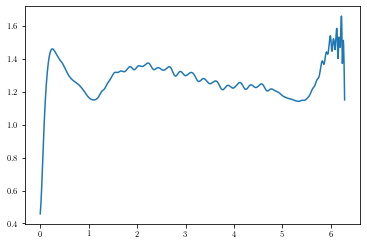

In [11]:
plt.plot(phis, lr_true)

### BCE

In [34]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':bce, 'd':4}
params_2 = {'loss':tanh_bce, 'd':4, 'output': 'linear'}
params_3 = {'loss':arctan_bce, 'd':4,  'output': 'linear'}

filestr = 'models/zenodo/c_bce/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

lr_calc_1 = odds_lr
lr_calc_2 = tanh_lr
lr_calc_3 = arctan_lr

# Plotting
w = 3.5
h = 3.25
labels = [r'$\sigma(z)$', r'$\frac{1}{2}\left(\tanh{z} + 1\right)$', r'$\frac{1}{\pi}\left(\arctan{z} + \frac{\pi}{2}\right)$']
y_lim = (0, 3)
title = r'\it BCE $\phi$ Scan'
filename = 'plots/zenodo/scans/bce_phi.png'

In [35]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    print(i, end = ' ')
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = lr_calc_1(model_1, m, s)
    lrs_2[i] = lr_calc_2(model_2, m, s)
    lrs_3[i] = lr_calc_3(model_3, m, s)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [36]:
# Calculate predictions
preds_1 = get_preds(lrs_1, xs)
preds_2 = get_preds(lrs_2, xs)
preds_3 = get_preds(lrs_3, xs)

# Save results
np.save(filestr + 'scans/{}/xs.npy'.format(var_string), xs)
np.save(filestr + 'scans/{}/preds_1.npy'.format(var_string), preds_1)
np.save(filestr + 'scans/{}/preds_2.npy'.format(var_string), preds_2)
np.save(filestr + 'scans/{}/preds_3.npy'.format(var_string), preds_3)

In [37]:
ensembles = [preds_1, preds_2, preds_3]
n = len(ensembles)

lrs = [None] * n
lrrs = [None] * n
for i in range(n):
    lrs[i] = avg_lr(ensembles[i])
    lrrs[i] = avg_lrr(lr, ensembles[i], xs)

In [38]:
cs = ['crimson', 'orangered', 'darkorange']
lss = [':', '--', '-.']

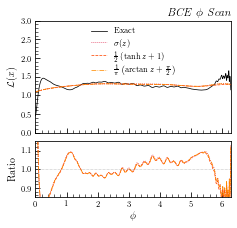

In [39]:
fig, axs = plt.subplots(2, 1,
                        figsize = (w, h),
                        sharex = True, 
                        gridspec_kw = {'height_ratios': [2, 1]})

if title:
    axs[0].set_title(title, loc = 'right')

# Plot likelihood ratios
axs[0].plot(var, lr_true, label = 'Exact', c = 'k', lw = 0.75)

for i in range(n):
    axs[0].plot(var, 
                lrs[i], 
                label = labels[i],
                c = cs[i % len(cs)], 
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[0].set_xlim(var[0], var[-1])
if y_lim:
    axs[0].set_ylim(y_lim[0], y_lim[1])
axs[0].legend()
axs[0].minorticks_on()
axs[0].tick_params(which = 'minor', length = 3)
axs[0].tick_params(which = 'major', length = 5)
axs[0].tick_params(which = 'both', direction='in')
axs[0].set_ylabel('$\mathcal{L}(x)$')
axs[0].legend(frameon = False)

# Plot likelihood ratio ratios
for i in range(n):
    axs[1].plot(var, 
                lrrs[i],
                c = cs[i % len(cs)],
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[1].axhline(1,ls=":",color="grey", lw=0.5)
axs[1].axvline(0,ls=":",color="grey", lw=0.5)
axs[1].set_ylim(0.85, 1.15);
axs[1].minorticks_on()
axs[1].tick_params(which = 'minor', length = 3)
axs[1].tick_params(which = 'major', length = 5)
axs[1].tick_params(which = 'both', direction='in')
axs[1].set_ylabel('Ratio')

plt.subplots_adjust(hspace = 0.1)
plt.xlabel(var_label)

if filename:
    plt.savefig(filename, 
                dpi = 300,
                transparent = True,
                bbox_inches = 'tight')

### MSE

In [17]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':mse, 'd':4}
params_2 = {'loss':tanh_mse, 'd':4, 'output': 'linear'}
params_3 = {'loss':arctan_mse, 'd':4,  'output': 'linear'}

filestr = 'models/zenodo/c_mse/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

lr_calc_1 = odds_lr
lr_calc_2 = tanh_lr
lr_calc_3 = arctan_lr

# Plotting
w = 3.5
h = 3.25
labels = [r'$\sigma(z)$', r'$\frac{1}{2}\left(\tanh{z} + 1\right)$', r'$\frac{1}{\pi}\left(\arctan{z} + \frac{\pi}{2}\right)$']
y_lim = (0, 3)
title = r'\it MSE $\phi$ Scan'
filename = 'plots/zenodo/scans/mse_phi.png'

In [18]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    print(i, end = ' ')
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = lr_calc_1(model_1, m, s)
    lrs_2[i] = lr_calc_2(model_2, m, s)
    lrs_3[i] = lr_calc_3(model_3, m, s)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [19]:
# Calculate predictions
preds_1 = get_preds(lrs_1, xs)
preds_2 = get_preds(lrs_2, xs)
preds_3 = get_preds(lrs_3, xs)

# Save results
np.save(filestr + 'scans/{}/xs.npy'.format(var_string), xs)
np.save(filestr + 'scans/{}/preds_1.npy'.format(var_string), preds_1)
np.save(filestr + 'scans/{}/preds_2.npy'.format(var_string), preds_2)
np.save(filestr + 'scans/{}/preds_3.npy'.format(var_string), preds_3)

In [20]:
ensembles = [preds_1, preds_2, preds_3]
n = len(ensembles)

lrs = [None] * n
lrrs = [None] * n
for i in range(n):
    lrs[i] = avg_lr(ensembles[i])
    lrrs[i] = avg_lrr(lr, ensembles[i], xs)

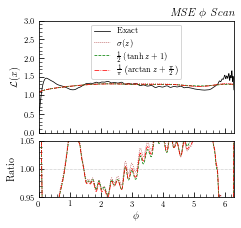

In [21]:
fig, axs = plt.subplots(2, 1,
                        figsize = (w, h),
                        sharex = True, 
                        gridspec_kw = {'height_ratios': [2, 1]})

if title:
    axs[0].set_title(title, loc = 'right')

# Plot likelihood ratios
axs[0].plot(var, lr_true, label = 'Exact', c = 'k', lw = 0.75)

for i in range(n):
    axs[0].plot(var, 
                lrs[i], 
                label = labels[i],
                c = cs[i % len(cs)], 
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[0].set_xlim(var[0], var[-1])
if y_lim:
    axs[0].set_ylim(y_lim[0], y_lim[1])
axs[0].legend()
axs[0].minorticks_on()
axs[0].tick_params(which = 'minor', length = 3)
axs[0].tick_params(which = 'major', length = 5)
axs[0].tick_params(which = 'both', direction='in')
axs[0].set_ylabel('$\mathcal{L}(x)$')

# Plot likelihood ratio ratios
for i in range(n):
    axs[1].plot(var, 
                lrrs[i],
                c = cs[i % len(cs)],
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[1].axhline(1,ls=":",color="grey", lw=0.5)
axs[1].axvline(0,ls=":",color="grey", lw=0.5)
axs[1].set_ylim(0.85, 1.15);
axs[1].minorticks_on()
axs[1].tick_params(which = 'minor', length = 3)
axs[1].tick_params(which = 'major', length = 5)
axs[1].tick_params(which = 'both', direction='in')
axs[1].set_ylabel('Ratio')

plt.subplots_adjust(hspace = 0.1)
plt.xlabel(var_label)

if filename:
    plt.savefig(filename, 
                dpi = 300,
                transparent = True,
                bbox_inches = 'tight')

### MLC

In [22]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':mlc, 'd': 4, 'output': 'relu'}
params_2 = {'loss':square_mlc, 'd': 4, 'output': 'linear'}
params_3 = {'loss':exp_mlc, 'd': 4, 'output': 'linear'}

filestr = 'models/zenodo/c_mlc/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

lr_calc_1 = pure_lr
lr_calc_2 = square_lr
lr_calc_3 = exp_lr

# Plotting
w = 3.5
h = 3.25
labels = [r'$\text{ReLU}(z)$', r'$z^2$', r'$\exp{z}$']
y_lim = (0, 3)
title = r'\it MLC $\phi$ Scan'
filename = 'plots/zenodo/scans/mlc_phi.png'

In [23]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    print(i, end = ' ')
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = lr_calc_1(model_1, m, s)
    lrs_2[i] = lr_calc_2(model_2, m, s)
    lrs_3[i] = lr_calc_3(model_3, m, s)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [24]:
# Calculate predictions
preds_1 = get_preds(lrs_1, xs)
preds_2 = get_preds(lrs_2, xs)
preds_3 = get_preds(lrs_3, xs)

# Save results
np.save(filestr + 'scans/{}/xs.npy'.format(var_string), xs)
np.save(filestr + 'scans/{}/preds_1.npy'.format(var_string), preds_1)
np.save(filestr + 'scans/{}/preds_2.npy'.format(var_string), preds_2)
np.save(filestr + 'scans/{}/preds_3.npy'.format(var_string), preds_3)

In [25]:
ensembles = [preds_1, preds_2, preds_3]
n = len(ensembles)

lrs = [None] * n
lrrs = [None] * n
for i in range(n):
    lrs[i] = avg_lr(ensembles[i])
    lrrs[i] = avg_lrr(lr, ensembles[i], xs)

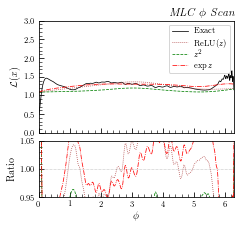

In [26]:
fig, axs = plt.subplots(2, 1,
                        figsize = (w, h),
                        sharex = True, 
                        gridspec_kw = {'height_ratios': [2, 1]})

if title:
    axs[0].set_title(title, loc = 'right')

# Plot likelihood ratios
axs[0].plot(var, lr_true, label = 'Exact', c = 'k', lw = 0.75)

for i in range(n):
    axs[0].plot(var, 
                lrs[i], 
                label = labels[i],
                c = cs[i % len(cs)], 
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[0].set_xlim(var[0], var[-1])
if y_lim:
    axs[0].set_ylim(y_lim[0], y_lim[1])
axs[0].legend()
axs[0].minorticks_on()
axs[0].tick_params(which = 'minor', length = 3)
axs[0].tick_params(which = 'major', length = 5)
axs[0].tick_params(which = 'both', direction='in')
axs[0].set_ylabel('$\mathcal{L}(x)$')

# Plot likelihood ratio ratios
for i in range(n):
    axs[1].plot(var, 
                lrrs[i],
                c = cs[i % len(cs)],
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[1].axhline(1,ls=":",color="grey", lw=0.5)
axs[1].axvline(0,ls=":",color="grey", lw=0.5)
axs[1].set_ylim(0.95, 1.05);
axs[1].minorticks_on()
axs[1].tick_params(which = 'minor', length = 3)
axs[1].tick_params(which = 'major', length = 5)
axs[1].tick_params(which = 'both', direction='in')
axs[1].set_ylabel('Ratio')

plt.subplots_adjust(hspace = 0.1)
plt.xlabel(var_label)

if filename:
    plt.savefig(filename, 
                dpi = 300,
                transparent = True,
                bbox_inches = 'tight')

### SQR

In [27]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':sqr, 'd': 4, 'output': 'relu'}
params_2 = {'loss':square_sqr, 'd': 4, 'output': 'linear'}
params_3 = {'loss':exp_sqr, 'd': 4, 'output': 'linear'}

filestr = 'models/zenodo/c_sqr/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

lr_calc_1 = pure_lr
lr_calc_2 = square_lr
lr_calc_3 = exp_lr

# Plotting
w = 3.5
h = 3.25
labels = [r'$\text{ReLU}(z)$', r'$z^2$', r'$\exp{z}$']
y_lim = (0, 3)
title = r'\it SQR $\phi$ Scan'
filename = 'plots/zenodo/scans/sqr_phi.png'

In [28]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    print(i, end = ' ')
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = lr_calc_1(model_1, m, s)
    lrs_2[i] = lr_calc_2(model_2, m, s)
    lrs_3[i] = lr_calc_3(model_3, m, s)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [29]:
# Calculate predictions
preds_1 = get_preds(lrs_1, xs)
preds_2 = get_preds(lrs_2, xs)
preds_3 = get_preds(lrs_3, xs)

# Save results
np.save(filestr + 'scans/{}/xs.npy'.format(var_string), xs)
np.save(filestr + 'scans/{}/preds_1.npy'.format(var_string), preds_1)
np.save(filestr + 'scans/{}/preds_2.npy'.format(var_string), preds_2)
np.save(filestr + 'scans/{}/preds_3.npy'.format(var_string), preds_3)

In [30]:
ensembles = [preds_1, preds_2, preds_3]
n = len(ensembles)

lrs = [None] * n
lrrs = [None] * n
for i in range(n):
    lrs[i] = avg_lr(ensembles[i])
    lrrs[i] = avg_lrr(lr, ensembles[i], xs)

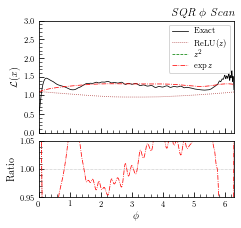

In [31]:
fig, axs = plt.subplots(2, 1,
                        figsize = (w, h),
                        sharex = True, 
                        gridspec_kw = {'height_ratios': [2, 1]})

if title:
    axs[0].set_title(title, loc = 'right')

# Plot likelihood ratios
axs[0].plot(var, lr_true, label = 'Exact', c = 'k', lw = 0.75)

for i in range(n):
    axs[0].plot(var, 
                lrs[i], 
                label = labels[i],
                c = cs[i % len(cs)], 
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[0].set_xlim(var[0], var[-1])
if y_lim:
    axs[0].set_ylim(y_lim[0], y_lim[1])
axs[0].legend()
axs[0].minorticks_on()
axs[0].tick_params(which = 'minor', length = 3)
axs[0].tick_params(which = 'major', length = 5)
axs[0].tick_params(which = 'both', direction='in')
axs[0].set_ylabel('$\mathcal{L}(x)$')

# Plot likelihood ratio ratios
for i in range(n):
    axs[1].plot(var, 
                lrrs[i],
                c = cs[i % len(cs)],
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[1].axhline(1,ls=":",color="grey", lw=0.5)
axs[1].axvline(0,ls=":",color="grey", lw=0.5)
axs[1].set_ylim(0.85, 1.15);
axs[1].minorticks_on()
axs[1].tick_params(which = 'minor', length = 3)
axs[1].tick_params(which = 'major', length = 5)
axs[1].tick_params(which = 'both', direction='in')
axs[1].set_ylabel('Ratio')

plt.subplots_adjust(hspace = 0.1)
plt.xlabel(var_label)

if filename:
    plt.savefig(filename, 
                dpi = 300,
                transparent = True,
                bbox_inches = 'tight')

## $p_T$ Scan

In [68]:
# Get a one-dimensional slice of test points.
pTs = np.linspace(0, 750, 1201).reshape(-1, 1)
etas = np.repeat(mode_eta, len(pTs)).reshape(-1, 1)
phis = np.repeat(mode_phi, len(pTs)).reshape(-1, 1)
ms = np.repeat(mode_m, len(pTs)).reshape(-1, 1)

xs = np.hstack([pTs, etas, phis, ms])
var = pTs
var_label = r'$p_T$'
var_string = 'pT'

lr_true = lr(xs)

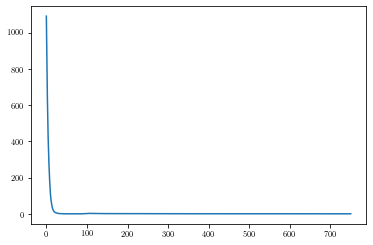

In [69]:
plt.plot(pTs, lr_true)

### BCE

In [70]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':bce, 'd':4}
params_2 = {'loss':tanh_bce, 'd':4, 'output': 'linear'}
params_3 = {'loss':arctan_bce, 'd':4,  'output': 'linear'}

filestr = 'models/zenodo/c_bce/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

lr_calc_1 = odds_lr
lr_calc_2 = tanh_lr
lr_calc_3 = arctan_lr

# Plotting
w = 3.5
h = 3.25
labels = [r'$\sigma(z)$', r'$\frac{1}{2}\left(\tanh{z} + 1\right)$', r'$\frac{1}{\pi}\left(\arctan{z} + \frac{\pi}{2}\right)$']
y_lim = (0, 3)
title = r'\it BCE $\phi$ Scan'
filename = 'plots/zenodo/scans/bce_phi.png'

In [71]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    print(i, end = ' ')
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = lr_calc_1(model_1, m, s)
    lrs_2[i] = lr_calc_2(model_2, m, s)
    lrs_3[i] = lr_calc_3(model_3, m, s)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [72]:
# Calculate predictions
preds_1 = get_preds(lrs_1, xs)
preds_2 = get_preds(lrs_2, xs)
preds_3 = get_preds(lrs_3, xs)

# Save results
np.save(filestr + 'scans/{}/xs.npy'.format(var_string), xs)
np.save(filestr + 'scans/{}/preds_1.npy'.format(var_string), preds_1)
np.save(filestr + 'scans/{}/preds_2.npy'.format(var_string), preds_2)
np.save(filestr + 'scans/{}/preds_3.npy'.format(var_string), preds_3)

In [73]:
ensembles = [preds_1, preds_2, preds_3]
n = len(ensembles)

lrs = [None] * n
lrrs = [None] * n
for i in range(n):
    lrs[i] = avg_lr(ensembles[i])
    lrrs[i] = avg_lrr(lr, ensembles[i], xs)

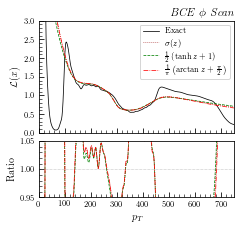

In [74]:
fig, axs = plt.subplots(2, 1,
                        figsize = (w, h),
                        sharex = True, 
                        gridspec_kw = {'height_ratios': [2, 1]})

if title:
    axs[0].set_title(title, loc = 'right')

# Plot likelihood ratios
axs[0].plot(var, lr_true, label = 'Exact', c = 'k', lw = 0.75)

for i in range(n):
    axs[0].plot(var, 
                lrs[i], 
                label = labels[i],
                c = cs[i % len(cs)], 
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[0].set_xlim(var[0], var[-1])
if y_lim:
    axs[0].set_ylim(y_lim[0], y_lim[1])
axs[0].legend()
axs[0].minorticks_on()
axs[0].tick_params(which = 'minor', length = 3)
axs[0].tick_params(which = 'major', length = 5)
axs[0].tick_params(which = 'both', direction='in')
axs[0].set_ylabel('$\mathcal{L}(x)$')

# Plot likelihood ratio ratios
for i in range(n):
    axs[1].plot(var, 
                lrrs[i],
                c = cs[i % len(cs)],
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[1].axhline(1,ls=":",color="grey", lw=0.5)
axs[1].axvline(0,ls=":",color="grey", lw=0.5)
axs[1].set_ylim(0.95, 1.05);
axs[1].minorticks_on()
axs[1].tick_params(which = 'minor', length = 3)
axs[1].tick_params(which = 'major', length = 5)
axs[1].tick_params(which = 'both', direction='in')
axs[1].set_ylabel('Ratio')

plt.subplots_adjust(hspace = 0.1)
plt.xlabel(var_label)

if filename:
    plt.savefig(filename, 
                dpi = 300,
                transparent = True,
                bbox_inches = 'tight')

### MSE

In [75]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':mse, 'd':4}
params_2 = {'loss':tanh_mse, 'd':4, 'output': 'linear'}
params_3 = {'loss':arctan_mse, 'd':4,  'output': 'linear'}

filestr = 'models/zenodo/c_mse/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

lr_calc_1 = odds_lr
lr_calc_2 = tanh_lr
lr_calc_3 = arctan_lr

# Plotting
w = 3.5
h = 3.25
labels = [r'$\sigma(z)$', r'$\frac{1}{2}\left(\tanh{z} + 1\right)$', r'$\frac{1}{\pi}\left(\arctan{z} + \frac{\pi}{2}\right)$']
y_lim = (0, 3)
title = r'\it MSE $\p_T$ Scan'
filename = 'plots/zenodo/scans/mse_phi.png'

In [76]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    print(i, end = ' ')
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = lr_calc_1(model_1, m, s)
    lrs_2[i] = lr_calc_2(model_2, m, s)
    lrs_3[i] = lr_calc_3(model_3, m, s)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [77]:
# Calculate predictions
preds_1 = get_preds(lrs_1, xs)
preds_2 = get_preds(lrs_2, xs)
preds_3 = get_preds(lrs_3, xs)

# Save results
np.save(filestr + 'scans/{}/xs.npy'.format(var_string), xs)
np.save(filestr + 'scans/{}/preds_1.npy'.format(var_string), preds_1)
np.save(filestr + 'scans/{}/preds_2.npy'.format(var_string), preds_2)
np.save(filestr + 'scans/{}/preds_3.npy'.format(var_string), preds_3)

In [78]:
ensembles = [preds_1, preds_2, preds_3]
n = len(ensembles)

lrs = [None] * n
lrrs = [None] * n
for i in range(n):
    lrs[i] = avg_lr(ensembles[i])
    lrrs[i] = avg_lrr(lr, ensembles[i], xs)

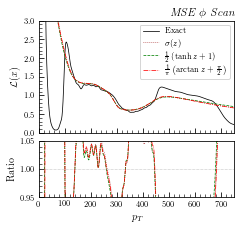

In [79]:
fig, axs = plt.subplots(2, 1,
                        figsize = (w, h),
                        sharex = True, 
                        gridspec_kw = {'height_ratios': [2, 1]})

if title:
    axs[0].set_title(title, loc = 'right')

# Plot likelihood ratios
axs[0].plot(var, lr_true, label = 'Exact', c = 'k', lw = 0.75)

for i in range(n):
    axs[0].plot(var, 
                lrs[i], 
                label = labels[i],
                c = cs[i % len(cs)], 
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[0].set_xlim(var[0], var[-1])
if y_lim:
    axs[0].set_ylim(y_lim[0], y_lim[1])
axs[0].legend()
axs[0].minorticks_on()
axs[0].tick_params(which = 'minor', length = 3)
axs[0].tick_params(which = 'major', length = 5)
axs[0].tick_params(which = 'both', direction='in')
axs[0].set_ylabel('$\mathcal{L}(x)$')

# Plot likelihood ratio ratios
for i in range(n):
    axs[1].plot(var, 
                lrrs[i],
                c = cs[i % len(cs)],
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[1].axhline(1,ls=":",color="grey", lw=0.5)
axs[1].axvline(0,ls=":",color="grey", lw=0.5)
axs[1].set_ylim(0.95, 1.05);
axs[1].minorticks_on()
axs[1].tick_params(which = 'minor', length = 3)
axs[1].tick_params(which = 'major', length = 5)
axs[1].tick_params(which = 'both', direction='in')
axs[1].set_ylabel('Ratio')

plt.subplots_adjust(hspace = 0.1)
plt.xlabel(var_label)

if filename:
    plt.savefig(filename, 
                dpi = 300,
                transparent = True,
                bbox_inches = 'tight')

### MLC

In [80]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':mlc, 'd': 4, 'output': 'relu'}
params_2 = {'loss':square_mlc, 'd': 4, 'output': 'linear'}
params_3 = {'loss':exp_mlc, 'd': 4, 'output': 'linear'}

filestr = 'models/zenodo/c_mlc/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

lr_calc_1 = pure_lr
lr_calc_2 = square_lr
lr_calc_3 = exp_lr

# Plotting
w = 3.5
h = 3.25
labels = [r'$\text{ReLU}(z)$', r'$z^2$', r'$\exp{z}$']
y_lim = (0, 3)
title = r'\it MLC $\phi$ Scan'
filename = 'plots/zenodo/scans/mlc_phi.png'

In [81]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    print(i, end = ' ')
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = lr_calc_1(model_1, m, s)
    lrs_2[i] = lr_calc_2(model_2, m, s)
    lrs_3[i] = lr_calc_3(model_3, m, s)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [82]:
# Calculate predictions
preds_1 = get_preds(lrs_1, xs)
preds_2 = get_preds(lrs_2, xs)
preds_3 = get_preds(lrs_3, xs)

# Save results
np.save(filestr + 'scans/{}/xs.npy'.format(var_string), xs)
np.save(filestr + 'scans/{}/preds_1.npy'.format(var_string), preds_1)
np.save(filestr + 'scans/{}/preds_2.npy'.format(var_string), preds_2)
np.save(filestr + 'scans/{}/preds_3.npy'.format(var_string), preds_3)

In [83]:
ensembles = [preds_1, preds_2, preds_3]
n = len(ensembles)

lrs = [None] * n
lrrs = [None] * n
for i in range(n):
    lrs[i] = avg_lr(ensembles[i])
    lrrs[i] = avg_lrr(lr, ensembles[i], xs)

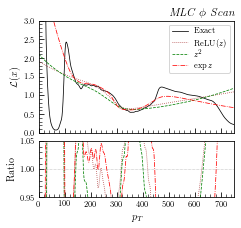

In [84]:
fig, axs = plt.subplots(2, 1,
                        figsize = (w, h),
                        sharex = True, 
                        gridspec_kw = {'height_ratios': [2, 1]})

if title:
    axs[0].set_title(title, loc = 'right')

# Plot likelihood ratios
axs[0].plot(var, lr_true, label = 'Exact', c = 'k', lw = 0.75)

for i in range(n):
    axs[0].plot(var, 
                lrs[i], 
                label = labels[i],
                c = cs[i % len(cs)], 
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[0].set_xlim(var[0], var[-1])
if y_lim:
    axs[0].set_ylim(y_lim[0], y_lim[1])
axs[0].legend()
axs[0].minorticks_on()
axs[0].tick_params(which = 'minor', length = 3)
axs[0].tick_params(which = 'major', length = 5)
axs[0].tick_params(which = 'both', direction='in')
axs[0].set_ylabel('$\mathcal{L}(x)$')

# Plot likelihood ratio ratios
for i in range(n):
    axs[1].plot(var, 
                lrrs[i],
                c = cs[i % len(cs)],
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[1].axhline(1,ls=":",color="grey", lw=0.5)
axs[1].axvline(0,ls=":",color="grey", lw=0.5)
axs[1].set_ylim(0.95, 1.05);
axs[1].minorticks_on()
axs[1].tick_params(which = 'minor', length = 3)
axs[1].tick_params(which = 'major', length = 5)
axs[1].tick_params(which = 'both', direction='in')
axs[1].set_ylabel('Ratio')

plt.subplots_adjust(hspace = 0.1)
plt.xlabel(var_label)

if filename:
    plt.savefig(filename, 
                dpi = 300,
                transparent = True,
                bbox_inches = 'tight')

### SQR

In [85]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':sqr, 'd': 4, 'output': 'relu'}
params_2 = {'loss':square_sqr, 'd': 4, 'output': 'linear'}
params_3 = {'loss':exp_sqr, 'd': 4, 'output': 'linear'}

filestr = 'models/zenodo/c_sqr/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

lr_calc_1 = pure_lr
lr_calc_2 = square_lr
lr_calc_3 = exp_lr

# Plotting
w = 3.5
h = 3.25
labels = [r'$\text{ReLU}(z)$', r'$z^2$', r'$\exp{z}$']
y_lim = (0, 3)
title = r'\it MLC $\phi$ Scan'
filename = 'plots/zenodo/scans/mlc_phi.png'

In [86]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    print(i, end = ' ')
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = lr_calc_1(model_1, m, s)
    lrs_2[i] = lr_calc_2(model_2, m, s)
    lrs_3[i] = lr_calc_3(model_3, m, s)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [87]:
# Calculate predictions
preds_1 = get_preds(lrs_1, xs)
preds_2 = get_preds(lrs_2, xs)
preds_3 = get_preds(lrs_3, xs)

# Save results
np.save(filestr + 'scans/{}/xs.npy'.format(var_string), xs)
np.save(filestr + 'scans/{}/preds_1.npy'.format(var_string), preds_1)
np.save(filestr + 'scans/{}/preds_2.npy'.format(var_string), preds_2)
np.save(filestr + 'scans/{}/preds_3.npy'.format(var_string), preds_3)

In [88]:
ensembles = [preds_1, preds_2, preds_3]
n = len(ensembles)

lrs = [None] * n
lrrs = [None] * n
for i in range(n):
    lrs[i] = avg_lr(ensembles[i])
    lrrs[i] = avg_lrr(lr, ensembles[i], xs)

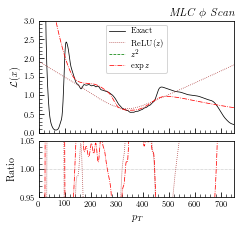

In [89]:
fig, axs = plt.subplots(2, 1,
                        figsize = (w, h),
                        sharex = True, 
                        gridspec_kw = {'height_ratios': [2, 1]})

if title:
    axs[0].set_title(title, loc = 'right')

# Plot likelihood ratios
axs[0].plot(var, lr_true, label = 'Exact', c = 'k', lw = 0.75)

for i in range(n):
    axs[0].plot(var, 
                lrs[i], 
                label = labels[i],
                c = cs[i % len(cs)], 
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[0].set_xlim(var[0], var[-1])
if y_lim:
    axs[0].set_ylim(y_lim[0], y_lim[1])
axs[0].legend()
axs[0].minorticks_on()
axs[0].tick_params(which = 'minor', length = 3)
axs[0].tick_params(which = 'major', length = 5)
axs[0].tick_params(which = 'both', direction='in')
axs[0].set_ylabel('$\mathcal{L}(x)$')

# Plot likelihood ratio ratios
for i in range(n):
    axs[1].plot(var, 
                lrrs[i],
                c = cs[i % len(cs)],
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[1].axhline(1,ls=":",color="grey", lw=0.5)
axs[1].axvline(0,ls=":",color="grey", lw=0.5)
axs[1].set_ylim(0.95, 1.05);
axs[1].minorticks_on()
axs[1].tick_params(which = 'minor', length = 3)
axs[1].tick_params(which = 'major', length = 5)
axs[1].tick_params(which = 'both', direction='in')
axs[1].set_ylabel('Ratio')

plt.subplots_adjust(hspace = 0.1)
plt.xlabel(var_label)

if filename:
    plt.savefig(filename, 
                dpi = 300,
                transparent = True,
                bbox_inches = 'tight')

## $\eta$ Scan

In [90]:
# Get a one-dimensional slice of test points.
etas = np.linspace(-5, 5, 1001).reshape(-1, 1)
pTs = np.repeat(mode_pT, len(etas)).reshape(-1, 1)
phis = np.repeat(mode_phi, len(etas)).reshape(-1, 1)
ms = np.repeat(mode_m, len(etas)).reshape(-1, 1)

xs = np.hstack([pTs, etas, phis, ms])
var = etas
var_label = r'$\eta$'
var_string = 'eta'

lr_true = lr(xs)

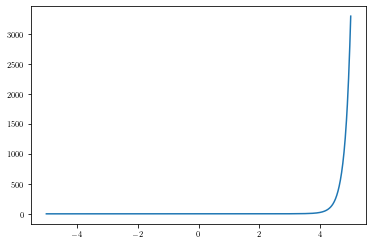

In [91]:
plt.plot(etas, lr_true)

### BCE

In [92]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':bce, 'd':4}
params_2 = {'loss':tanh_bce, 'd':4, 'output': 'linear'}
params_3 = {'loss':arctan_bce, 'd':4,  'output': 'linear'}

filestr = 'models/zenodo/c_bce/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

lr_calc_1 = odds_lr
lr_calc_2 = tanh_lr
lr_calc_3 = arctan_lr

# Plotting
w = 3.5
h = 3.25
labels = [r'$\sigma(z)$', r'$\frac{1}{2}\left(\tanh{z} + 1\right)$', r'$\frac{1}{\pi}\left(\arctan{z} + \frac{\pi}{2}\right)$']
y_lim = (0, 3)
title = r'\it BCE $\phi$ Scan'
filename = 'plots/zenodo/scans/bce_phi.png'

In [93]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    print(i, end = ' ')
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = lr_calc_1(model_1, m, s)
    lrs_2[i] = lr_calc_2(model_2, m, s)
    lrs_3[i] = lr_calc_3(model_3, m, s)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [94]:
# Calculate predictions
preds_1 = get_preds(lrs_1, xs)
preds_2 = get_preds(lrs_2, xs)
preds_3 = get_preds(lrs_3, xs)

# Save results
np.save(filestr + 'scans/{}/xs.npy'.format(var_string), xs)
np.save(filestr + 'scans/{}/preds_1.npy'.format(var_string), preds_1)
np.save(filestr + 'scans/{}/preds_2.npy'.format(var_string), preds_2)
np.save(filestr + 'scans/{}/preds_3.npy'.format(var_string), preds_3)

In [95]:
ensembles = [preds_1, preds_2, preds_3]
n = len(ensembles)

lrs = [None] * n
lrrs = [None] * n
for i in range(n):
    lrs[i] = avg_lr(ensembles[i])
    lrrs[i] = avg_lrr(lr, ensembles[i], xs)

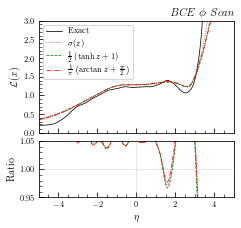

In [96]:
fig, axs = plt.subplots(2, 1,
                        figsize = (w, h),
                        sharex = True, 
                        gridspec_kw = {'height_ratios': [2, 1]})

if title:
    axs[0].set_title(title, loc = 'right')

# Plot likelihood ratios
axs[0].plot(var, lr_true, label = 'Exact', c = 'k', lw = 0.75)

for i in range(n):
    axs[0].plot(var, 
                lrs[i], 
                label = labels[i],
                c = cs[i % len(cs)], 
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[0].set_xlim(var[0], var[-1])
if y_lim:
    axs[0].set_ylim(y_lim[0], y_lim[1])
axs[0].legend()
axs[0].minorticks_on()
axs[0].tick_params(which = 'minor', length = 3)
axs[0].tick_params(which = 'major', length = 5)
axs[0].tick_params(which = 'both', direction='in')
axs[0].set_ylabel('$\mathcal{L}(x)$')

# Plot likelihood ratio ratios
for i in range(n):
    axs[1].plot(var, 
                lrrs[i],
                c = cs[i % len(cs)],
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[1].axhline(1,ls=":",color="grey", lw=0.5)
axs[1].axvline(0,ls=":",color="grey", lw=0.5)
axs[1].set_ylim(0.95, 1.05);
axs[1].minorticks_on()
axs[1].tick_params(which = 'minor', length = 3)
axs[1].tick_params(which = 'major', length = 5)
axs[1].tick_params(which = 'both', direction='in')
axs[1].set_ylabel('Ratio')

plt.subplots_adjust(hspace = 0.1)
plt.xlabel(var_label)

if filename:
    plt.savefig(filename, 
                dpi = 300,
                transparent = True,
                bbox_inches = 'tight')

### MSE

In [97]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':mse, 'd':4}
params_2 = {'loss':tanh_mse, 'd':4, 'output': 'linear'}
params_3 = {'loss':arctan_mse, 'd':4,  'output': 'linear'}

filestr = 'models/zenodo/c_mse/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

lr_calc_1 = odds_lr
lr_calc_2 = tanh_lr
lr_calc_3 = arctan_lr

# Plotting
w = 3.5
h = 3.25
labels = [r'$\sigma(z)$', r'$\frac{1}{2}\left(\tanh{z} + 1\right)$', r'$\frac{1}{\pi}\left(\arctan{z} + \frac{\pi}{2}\right)$']
y_lim = (0, 3)
title = r'\it MSE $\phi$ Scan'
filename = 'plots/zenodo/scans/mse_phi.png'

In [98]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    print(i, end = ' ')
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = lr_calc_1(model_1, m, s)
    lrs_2[i] = lr_calc_2(model_2, m, s)
    lrs_3[i] = lr_calc_3(model_3, m, s)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [99]:
# Calculate predictions
preds_1 = get_preds(lrs_1, xs)
preds_2 = get_preds(lrs_2, xs)
preds_3 = get_preds(lrs_3, xs)

# Save results
np.save(filestr + 'scans/{}/xs.npy'.format(var_string), xs)
np.save(filestr + 'scans/{}/preds_1.npy'.format(var_string), preds_1)
np.save(filestr + 'scans/{}/preds_2.npy'.format(var_string), preds_2)
np.save(filestr + 'scans/{}/preds_3.npy'.format(var_string), preds_3)

In [100]:
ensembles = [preds_1, preds_2, preds_3]
n = len(ensembles)

lrs = [None] * n
lrrs = [None] * n
for i in range(n):
    lrs[i] = avg_lr(ensembles[i])
    lrrs[i] = avg_lrr(lr, ensembles[i], xs)

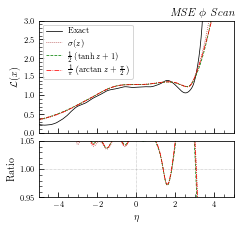

In [101]:
fig, axs = plt.subplots(2, 1,
                        figsize = (w, h),
                        sharex = True, 
                        gridspec_kw = {'height_ratios': [2, 1]})

if title:
    axs[0].set_title(title, loc = 'right')

# Plot likelihood ratios
axs[0].plot(var, lr_true, label = 'Exact', c = 'k', lw = 0.75)

for i in range(n):
    axs[0].plot(var, 
                lrs[i], 
                label = labels[i],
                c = cs[i % len(cs)], 
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[0].set_xlim(var[0], var[-1])
if y_lim:
    axs[0].set_ylim(y_lim[0], y_lim[1])
axs[0].legend()
axs[0].minorticks_on()
axs[0].tick_params(which = 'minor', length = 3)
axs[0].tick_params(which = 'major', length = 5)
axs[0].tick_params(which = 'both', direction='in')
axs[0].set_ylabel('$\mathcal{L}(x)$')

# Plot likelihood ratio ratios
for i in range(n):
    axs[1].plot(var, 
                lrrs[i],
                c = cs[i % len(cs)],
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[1].axhline(1,ls=":",color="grey", lw=0.5)
axs[1].axvline(0,ls=":",color="grey", lw=0.5)
axs[1].set_ylim(0.95, 1.05);
axs[1].minorticks_on()
axs[1].tick_params(which = 'minor', length = 3)
axs[1].tick_params(which = 'major', length = 5)
axs[1].tick_params(which = 'both', direction='in')
axs[1].set_ylabel('Ratio')

plt.subplots_adjust(hspace = 0.1)
plt.xlabel(var_label)

if filename:
    plt.savefig(filename, 
                dpi = 300,
                transparent = True,
                bbox_inches = 'tight')

### MLC

In [102]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':mlc, 'd': 4, 'output': 'relu'}
params_2 = {'loss':square_mlc, 'd': 4, 'output': 'linear'}
params_3 = {'loss':exp_mlc, 'd': 4, 'output': 'linear'}

filestr = 'models/zenodo/c_mlc/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

lr_calc_1 = pure_lr
lr_calc_2 = square_lr
lr_calc_3 = exp_lr

# Plotting
w = 3.5
h = 3.25
labels = [r'$\text{ReLU}(z)$', r'$z^2$', r'$\exp{z}$']
y_lim = (0, 3)
title = r'\it MLC $\phi$ Scan'
filename = 'plots/zenodo/scans/mlc_phi.png'

In [103]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    print(i, end = ' ')
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = lr_calc_1(model_1, m, s)
    lrs_2[i] = lr_calc_2(model_2, m, s)
    lrs_3[i] = lr_calc_3(model_3, m, s)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [104]:
# Calculate predictions
preds_1 = get_preds(lrs_1, xs)
preds_2 = get_preds(lrs_2, xs)
preds_3 = get_preds(lrs_3, xs)

# Save results
np.save(filestr + 'scans/{}/xs.npy'.format(var_string), xs)
np.save(filestr + 'scans/{}/preds_1.npy'.format(var_string), preds_1)
np.save(filestr + 'scans/{}/preds_2.npy'.format(var_string), preds_2)
np.save(filestr + 'scans/{}/preds_3.npy'.format(var_string), preds_3)

In [105]:
ensembles = [preds_1, preds_2, preds_3]
n = len(ensembles)

lrs = [None] * n
lrrs = [None] * n
for i in range(n):
    lrs[i] = avg_lr(ensembles[i])
    lrrs[i] = avg_lrr(lr, ensembles[i], xs)

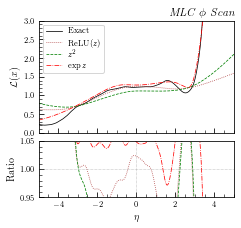

In [106]:
fig, axs = plt.subplots(2, 1,
                        figsize = (w, h),
                        sharex = True, 
                        gridspec_kw = {'height_ratios': [2, 1]})

if title:
    axs[0].set_title(title, loc = 'right')

# Plot likelihood ratios
axs[0].plot(var, lr_true, label = 'Exact', c = 'k', lw = 0.75)

for i in range(n):
    axs[0].plot(var, 
                lrs[i], 
                label = labels[i],
                c = cs[i % len(cs)], 
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[0].set_xlim(var[0], var[-1])
if y_lim:
    axs[0].set_ylim(y_lim[0], y_lim[1])
axs[0].legend()
axs[0].minorticks_on()
axs[0].tick_params(which = 'minor', length = 3)
axs[0].tick_params(which = 'major', length = 5)
axs[0].tick_params(which = 'both', direction='in')
axs[0].set_ylabel('$\mathcal{L}(x)$')

# Plot likelihood ratio ratios
for i in range(n):
    axs[1].plot(var, 
                lrrs[i],
                c = cs[i % len(cs)],
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[1].axhline(1,ls=":",color="grey", lw=0.5)
axs[1].axvline(0,ls=":",color="grey", lw=0.5)
axs[1].set_ylim(0.95, 1.05);
axs[1].minorticks_on()
axs[1].tick_params(which = 'minor', length = 3)
axs[1].tick_params(which = 'major', length = 5)
axs[1].tick_params(which = 'both', direction='in')
axs[1].set_ylabel('Ratio')

plt.subplots_adjust(hspace = 0.1)
plt.xlabel(var_label)

if filename:
    plt.savefig(filename, 
                dpi = 300,
                transparent = True,
                bbox_inches = 'tight')

### SQR

In [107]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':sqr, 'd': 4, 'output': 'relu'}
params_2 = {'loss':square_sqr, 'd': 4, 'output': 'linear'}
params_3 = {'loss':exp_sqr, 'd': 4, 'output': 'linear'}

filestr = 'models/zenodo/c_sqr/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

lr_calc_1 = pure_lr
lr_calc_2 = square_lr
lr_calc_3 = exp_lr

# Plotting
w = 3.5
h = 3.25
labels = [r'$\text{ReLU}(z)$', r'$z^2$', r'$\exp{z}$']
y_lim = (0, 3)
title = r'\it MLC $\phi$ Scan'
filename = 'plots/zenodo/scans/mlc_phi.png'

In [108]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    print(i, end = ' ')
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = lr_calc_1(model_1, m, s)
    lrs_2[i] = lr_calc_2(model_2, m, s)
    lrs_3[i] = lr_calc_3(model_3, m, s)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [109]:
# Calculate predictions
preds_1 = get_preds(lrs_1, xs)
preds_2 = get_preds(lrs_2, xs)
preds_3 = get_preds(lrs_3, xs)

# Save results
np.save(filestr + 'scans/{}/xs.npy'.format(var_string), xs)
np.save(filestr + 'scans/{}/preds_1.npy'.format(var_string), preds_1)
np.save(filestr + 'scans/{}/preds_2.npy'.format(var_string), preds_2)
np.save(filestr + 'scans/{}/preds_3.npy'.format(var_string), preds_3)

In [110]:
ensembles = [preds_1, preds_2, preds_3]
n = len(ensembles)

lrs = [None] * n
lrrs = [None] * n
for i in range(n):
    lrs[i] = avg_lr(ensembles[i])
    lrrs[i] = avg_lrr(lr, ensembles[i], xs)

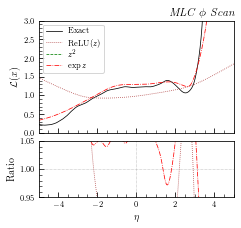

In [111]:
fig, axs = plt.subplots(2, 1,
                        figsize = (w, h),
                        sharex = True, 
                        gridspec_kw = {'height_ratios': [2, 1]})

if title:
    axs[0].set_title(title, loc = 'right')

# Plot likelihood ratios
axs[0].plot(var, lr_true, label = 'Exact', c = 'k', lw = 0.75)

for i in range(n):
    axs[0].plot(var, 
                lrs[i], 
                label = labels[i],
                c = cs[i % len(cs)], 
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[0].set_xlim(var[0], var[-1])
if y_lim:
    axs[0].set_ylim(y_lim[0], y_lim[1])
axs[0].legend()
axs[0].minorticks_on()
axs[0].tick_params(which = 'minor', length = 3)
axs[0].tick_params(which = 'major', length = 5)
axs[0].tick_params(which = 'both', direction='in')
axs[0].set_ylabel('$\mathcal{L}(x)$')

# Plot likelihood ratio ratios
for i in range(n):
    axs[1].plot(var, 
                lrrs[i],
                c = cs[i % len(cs)],
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[1].axhline(1,ls=":",color="grey", lw=0.5)
axs[1].axvline(0,ls=":",color="grey", lw=0.5)
axs[1].set_ylim(0.95, 1.05);
axs[1].minorticks_on()
axs[1].tick_params(which = 'minor', length = 3)
axs[1].tick_params(which = 'major', length = 5)
axs[1].tick_params(which = 'both', direction='in')
axs[1].set_ylabel('Ratio')

plt.subplots_adjust(hspace = 0.1)
plt.xlabel(var_label)

if filename:
    plt.savefig(filename, 
                dpi = 300,
                transparent = True,
                bbox_inches = 'tight')

## $m$ Scan

In [112]:
# Get a one-dimensional slice of test points.
ms = np.linspace(0, 80, 1001).reshape(-1, 1)
pTs = np.repeat(mode_pT, len(ms)).reshape(-1, 1)
phis = np.repeat(mode_phi, len(ms)).reshape(-1, 1)
etas = np.repeat(mode_eta, len(ms)).reshape(-1, 1)

xs = np.hstack([pTs, etas, phis, ms])
var = ms
var_label = r'$m$'
var_string = 'm'

lr_true = lr(xs)

lr_true = lr(xs)

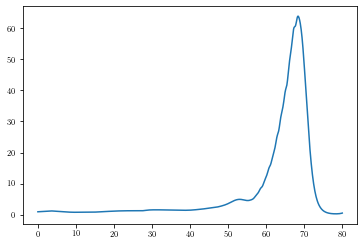

In [113]:
plt.plot(ms, lr_true)

### BCE

In [114]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':bce, 'd':4}
params_2 = {'loss':tanh_bce, 'd':4, 'output': 'linear'}
params_3 = {'loss':arctan_bce, 'd':4,  'output': 'linear'}

filestr = 'models/zenodo/c_bce/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

lr_calc_1 = odds_lr
lr_calc_2 = tanh_lr
lr_calc_3 = arctan_lr

# Plotting
w = 3.5
h = 3.25
labels = [r'$\sigma(z)$', r'$\frac{1}{2}\left(\tanh{z} + 1\right)$', r'$\frac{1}{\pi}\left(\arctan{z} + \frac{\pi}{2}\right)$']
y_lim = (0, 3)
title = r'\it BCE $\phi$ Scan'
filename = 'plots/zenodo/scans/bce_phi.png'

In [115]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    print(i, end = ' ')
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = lr_calc_1(model_1, m, s)
    lrs_2[i] = lr_calc_2(model_2, m, s)
    lrs_3[i] = lr_calc_3(model_3, m, s)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [116]:
# Calculate predictions
preds_1 = get_preds(lrs_1, xs)
preds_2 = get_preds(lrs_2, xs)
preds_3 = get_preds(lrs_3, xs)

# Save results
np.save(filestr + 'scans/{}/xs.npy'.format(var_string), xs)
np.save(filestr + 'scans/{}/preds_1.npy'.format(var_string), preds_1)
np.save(filestr + 'scans/{}/preds_2.npy'.format(var_string), preds_2)
np.save(filestr + 'scans/{}/preds_3.npy'.format(var_string), preds_3)

In [117]:
ensembles = [preds_1, preds_2, preds_3]
n = len(ensembles)

lrs = [None] * n
lrrs = [None] * n
for i in range(n):
    lrs[i] = avg_lr(ensembles[i])
    lrrs[i] = avg_lrr(lr, ensembles[i], xs)

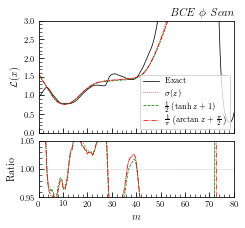

In [118]:
fig, axs = plt.subplots(2, 1,
                        figsize = (w, h),
                        sharex = True, 
                        gridspec_kw = {'height_ratios': [2, 1]})

if title:
    axs[0].set_title(title, loc = 'right')

# Plot likelihood ratios
axs[0].plot(var, lr_true, label = 'Exact', c = 'k', lw = 0.75)

for i in range(n):
    axs[0].plot(var, 
                lrs[i], 
                label = labels[i],
                c = cs[i % len(cs)], 
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[0].set_xlim(var[0], var[-1])
if y_lim:
    axs[0].set_ylim(y_lim[0], y_lim[1])
axs[0].legend()
axs[0].minorticks_on()
axs[0].tick_params(which = 'minor', length = 3)
axs[0].tick_params(which = 'major', length = 5)
axs[0].tick_params(which = 'both', direction='in')
axs[0].set_ylabel('$\mathcal{L}(x)$')

# Plot likelihood ratio ratios
for i in range(n):
    axs[1].plot(var, 
                lrrs[i],
                c = cs[i % len(cs)],
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[1].axhline(1,ls=":",color="grey", lw=0.5)
axs[1].axvline(0,ls=":",color="grey", lw=0.5)
axs[1].set_ylim(0.95, 1.05);
axs[1].minorticks_on()
axs[1].tick_params(which = 'minor', length = 3)
axs[1].tick_params(which = 'major', length = 5)
axs[1].tick_params(which = 'both', direction='in')
axs[1].set_ylabel('Ratio')

plt.subplots_adjust(hspace = 0.1)
plt.xlabel(var_label)

if filename:
    plt.savefig(filename, 
                dpi = 300,
                transparent = True,
                bbox_inches = 'tight')

### MSE

In [119]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':mse, 'd':4}
params_2 = {'loss':tanh_mse, 'd':4, 'output': 'linear'}
params_3 = {'loss':arctan_mse, 'd':4,  'output': 'linear'}

filestr = 'models/zenodo/c_mse/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

lr_calc_1 = odds_lr
lr_calc_2 = tanh_lr
lr_calc_3 = arctan_lr

# Plotting
w = 3.5
h = 3.25
labels = [r'$\sigma(z)$', r'$\frac{1}{2}\left(\tanh{z} + 1\right)$', r'$\frac{1}{\pi}\left(\arctan{z} + \frac{\pi}{2}\right)$']
y_lim = (0, 3)
title = r'\it MSE $\phi$ Scan'
filename = 'plots/zenodo/scans/mse_phi.png'

In [120]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    print(i, end = ' ')
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = lr_calc_1(model_1, m, s)
    lrs_2[i] = lr_calc_2(model_2, m, s)
    lrs_3[i] = lr_calc_3(model_3, m, s)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [121]:
# Calculate predictions
preds_1 = get_preds(lrs_1, xs)
preds_2 = get_preds(lrs_2, xs)
preds_3 = get_preds(lrs_3, xs)

# Save results
np.save(filestr + 'scans/{}/xs.npy'.format(var_string), xs)
np.save(filestr + 'scans/{}/preds_1.npy'.format(var_string), preds_1)
np.save(filestr + 'scans/{}/preds_2.npy'.format(var_string), preds_2)
np.save(filestr + 'scans/{}/preds_3.npy'.format(var_string), preds_3)

In [122]:
ensembles = [preds_1, preds_2, preds_3]
n = len(ensembles)

lrs = [None] * n
lrrs = [None] * n
for i in range(n):
    lrs[i] = avg_lr(ensembles[i])
    lrrs[i] = avg_lrr(lr, ensembles[i], xs)

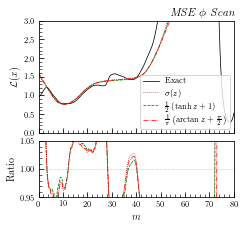

In [123]:
fig, axs = plt.subplots(2, 1,
                        figsize = (w, h),
                        sharex = True, 
                        gridspec_kw = {'height_ratios': [2, 1]})

if title:
    axs[0].set_title(title, loc = 'right')

# Plot likelihood ratios
axs[0].plot(var, lr_true, label = 'Exact', c = 'k', lw = 0.75)

for i in range(n):
    axs[0].plot(var, 
                lrs[i], 
                label = labels[i],
                c = cs[i % len(cs)], 
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[0].set_xlim(var[0], var[-1])
if y_lim:
    axs[0].set_ylim(y_lim[0], y_lim[1])
axs[0].legend()
axs[0].minorticks_on()
axs[0].tick_params(which = 'minor', length = 3)
axs[0].tick_params(which = 'major', length = 5)
axs[0].tick_params(which = 'both', direction='in')
axs[0].set_ylabel('$\mathcal{L}(x)$')

# Plot likelihood ratio ratios
for i in range(n):
    axs[1].plot(var, 
                lrrs[i],
                c = cs[i % len(cs)],
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[1].axhline(1,ls=":",color="grey", lw=0.5)
axs[1].axvline(0,ls=":",color="grey", lw=0.5)
axs[1].set_ylim(0.95, 1.05);
axs[1].minorticks_on()
axs[1].tick_params(which = 'minor', length = 3)
axs[1].tick_params(which = 'major', length = 5)
axs[1].tick_params(which = 'both', direction='in')
axs[1].set_ylabel('Ratio')

plt.subplots_adjust(hspace = 0.1)
plt.xlabel(var_label)

if filename:
    plt.savefig(filename, 
                dpi = 300,
                transparent = True,
                bbox_inches = 'tight')

### MLC

In [124]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':mlc, 'd': 4, 'output': 'relu'}
params_2 = {'loss':square_mlc, 'd': 4, 'output': 'linear'}
params_3 = {'loss':exp_mlc, 'd': 4, 'output': 'linear'}

filestr = 'models/zenodo/c_mlc/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

lr_calc_1 = pure_lr
lr_calc_2 = square_lr
lr_calc_3 = exp_lr

# Plotting
w = 3.5
h = 3.25
labels = [r'$\text{ReLU}(z)$', r'$z^2$', r'$\exp{z}$']
y_lim = (0, 3)
title = r'\it MLC $\phi$ Scan'
filename = 'plots/zenodo/scans/mlc_phi.png'

In [125]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    print(i, end = ' ')
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = lr_calc_1(model_1, m, s)
    lrs_2[i] = lr_calc_2(model_2, m, s)
    lrs_3[i] = lr_calc_3(model_3, m, s)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [126]:
# Calculate predictions
preds_1 = get_preds(lrs_1, xs)
preds_2 = get_preds(lrs_2, xs)
preds_3 = get_preds(lrs_3, xs)

# Save results
np.save(filestr + 'scans/{}/xs.npy'.format(var_string), xs)
np.save(filestr + 'scans/{}/preds_1.npy'.format(var_string), preds_1)
np.save(filestr + 'scans/{}/preds_2.npy'.format(var_string), preds_2)
np.save(filestr + 'scans/{}/preds_3.npy'.format(var_string), preds_3)

In [127]:
ensembles = [preds_1, preds_2, preds_3]
n = len(ensembles)

lrs = [None] * n
lrrs = [None] * n
for i in range(n):
    lrs[i] = avg_lr(ensembles[i])
    lrrs[i] = avg_lrr(lr, ensembles[i], xs)

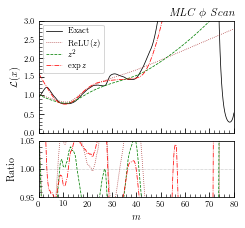

In [128]:
fig, axs = plt.subplots(2, 1,
                        figsize = (w, h),
                        sharex = True, 
                        gridspec_kw = {'height_ratios': [2, 1]})

if title:
    axs[0].set_title(title, loc = 'right')

# Plot likelihood ratios
axs[0].plot(var, lr_true, label = 'Exact', c = 'k', lw = 0.75)

for i in range(n):
    axs[0].plot(var, 
                lrs[i], 
                label = labels[i],
                c = cs[i % len(cs)], 
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[0].set_xlim(var[0], var[-1])
if y_lim:
    axs[0].set_ylim(y_lim[0], y_lim[1])
axs[0].legend()
axs[0].minorticks_on()
axs[0].tick_params(which = 'minor', length = 3)
axs[0].tick_params(which = 'major', length = 5)
axs[0].tick_params(which = 'both', direction='in')
axs[0].set_ylabel('$\mathcal{L}(x)$')

# Plot likelihood ratio ratios
for i in range(n):
    axs[1].plot(var, 
                lrrs[i],
                c = cs[i % len(cs)],
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[1].axhline(1,ls=":",color="grey", lw=0.5)
axs[1].axvline(0,ls=":",color="grey", lw=0.5)
axs[1].set_ylim(0.95, 1.05);
axs[1].minorticks_on()
axs[1].tick_params(which = 'minor', length = 3)
axs[1].tick_params(which = 'major', length = 5)
axs[1].tick_params(which = 'both', direction='in')
axs[1].set_ylabel('Ratio')

plt.subplots_adjust(hspace = 0.1)
plt.xlabel(var_label)

if filename:
    plt.savefig(filename, 
                dpi = 300,
                transparent = True,
                bbox_inches = 'tight')

### SQR

In [129]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':sqr, 'd': 4, 'output': 'relu'}
params_2 = {'loss':square_sqr, 'd': 4, 'output': 'linear'}
params_3 = {'loss':exp_sqr, 'd': 4, 'output': 'linear'}

filestr = 'models/zenodo/c_sqr/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

lr_calc_1 = pure_lr
lr_calc_2 = square_lr
lr_calc_3 = exp_lr

# Plotting
w = 3.5
h = 3.25
labels = [r'$\text{ReLU}(z)$', r'$z^2$', r'$\exp{z}$']
y_lim = (0, 3)
title = r'\it MLC $\phi$ Scan'
filename = 'plots/zenodo/scans/mlc_phi.png'

In [130]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    print(i, end = ' ')
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = lr_calc_1(model_1, m, s)
    lrs_2[i] = lr_calc_2(model_2, m, s)
    lrs_3[i] = lr_calc_3(model_3, m, s)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [131]:
# Calculate predictions
preds_1 = get_preds(lrs_1, xs)
preds_2 = get_preds(lrs_2, xs)
preds_3 = get_preds(lrs_3, xs)

# Save results
np.save(filestr + 'scans/{}/xs.npy'.format(var_string), xs)
np.save(filestr + 'scans/{}/preds_1.npy'.format(var_string), preds_1)
np.save(filestr + 'scans/{}/preds_2.npy'.format(var_string), preds_2)
np.save(filestr + 'scans/{}/preds_3.npy'.format(var_string), preds_3)

In [132]:
ensembles = [preds_1, preds_2, preds_3]
n = len(ensembles)

lrs = [None] * n
lrrs = [None] * n
for i in range(n):
    lrs[i] = avg_lr(ensembles[i])
    lrrs[i] = avg_lrr(lr, ensembles[i], xs)

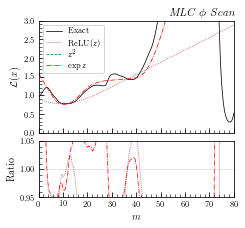

In [133]:
fig, axs = plt.subplots(2, 1,
                        figsize = (w, h),
                        sharex = True, 
                        gridspec_kw = {'height_ratios': [2, 1]})

if title:
    axs[0].set_title(title, loc = 'right')

# Plot likelihood ratios
axs[0].plot(var, lr_true, label = 'Exact', c = 'k', lw = 0.75)

for i in range(n):
    axs[0].plot(var, 
                lrs[i], 
                label = labels[i],
                c = cs[i % len(cs)], 
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[0].set_xlim(var[0], var[-1])
if y_lim:
    axs[0].set_ylim(y_lim[0], y_lim[1])
axs[0].legend()
axs[0].minorticks_on()
axs[0].tick_params(which = 'minor', length = 3)
axs[0].tick_params(which = 'major', length = 5)
axs[0].tick_params(which = 'both', direction='in')
axs[0].set_ylabel('$\mathcal{L}(x)$')

# Plot likelihood ratio ratios
for i in range(n):
    axs[1].plot(var, 
                lrrs[i],
                c = cs[i % len(cs)],
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[1].axhline(1,ls=":",color="grey", lw=0.5)
axs[1].axvline(0,ls=":",color="grey", lw=0.5)
axs[1].set_ylim(0.95, 1.05);
axs[1].minorticks_on()
axs[1].tick_params(which = 'minor', length = 3)
axs[1].tick_params(which = 'major', length = 5)
axs[1].tick_params(which = 'both', direction='in')
axs[1].set_ylabel('Ratio')

plt.subplots_adjust(hspace = 0.1)
plt.xlabel(var_label)

if filename:
    plt.savefig(filename, 
                dpi = 300,
                transparent = True,
                bbox_inches = 'tight')

# Scratch

In [340]:
N = 10**6
X_4 = np.load('data/zenodo/4/X_trn.npy')[:N]
y_4 = np.load('data/zenodo/4/y_trn.npy')[:N].astype('float32')
#data, m, s = split_data(X, y)

X_5 = np.load('data/zenodo/fold/5_old/X_trn.npy')[:N]
y_5 = np.load('data/zenodo/fold/5_old/y_trn.npy')[:N].astype('float32')

In [358]:
# Load in data.
mc = np.load("data/zenodo/Pythia21_Zjet_pTZ-200GeV_0.npz")

mc_pt =  mc['sim_jets'][:, 0] 
mc_eta = mc['sim_jets'][:, 1]
mc_phi = mc['sim_jets'][:, 2]
mc_m =   mc['sim_jets'][:, 3]
mc_w = mc['sim_widths']
mc_sdms = mc['sim_sdms']

mc = np.vstack([mc_pt, mc_eta, mc_m, mc_w, mc_sdms]).T


dt = np.load("data/zenodo/Herwig_Zjet_pTZ-200GeV_0.npz")

dt_pt =  dt['sim_jets'][:, 0] 
dt_eta = dt['sim_jets'][:, 1]
dt_phi = dt['sim_jets'][:, 2]
dt_m =   dt['sim_jets'][:, 3]
dt_w = dt['sim_widths']
dt_sdms = dt['sim_sdms']

dt = np.vstack([dt_pt, dt_eta, dt_m, dt_w, dt_sdms]).T

n, d = mc.shape

In [341]:
from matplotlib import rc
rc('text', usetex=False)

In [349]:
min(X_4[:, 0]), max(X_4[:, 0])

(-442.62903, 1521.77)

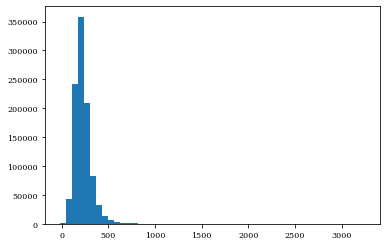

In [376]:
plt.hist(X_5[X_5[:, 0] > -20, 0], bins = 51);

In [383]:
min(X_4[:, 1]), max(X_4[:, 1])

(-5.8801866, 6.381986)

In [379]:
min(X_5[:, 1]), max(X_5[:, 1])

(-2475194600.0, 35799183000.0)

In [385]:
np.mean((X_5[:, 1] < -6) | (X_5[:, 1] > 7))

0.000103

In [380]:
min(X_5[:, 2]), max(X_5[:, 2])

(-12366857.0, 27590.432)

In [381]:
min(X_5[:, 3]), max(X_5[:, 3])

(-252134560.0, 31592.186)

In [382]:
min(X_5[:, 4]), max(X_5[:, 4])

(-441.0433, 2531.7422)

In [12]:
N = 10**6
X = np.load('data/zenodo/fold/6/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/6/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

X_trn, X_tst, y_trn, y_tst = data

In [13]:
params = {'loss':exp_sqr, 'd': 6, 'output': 'linear'}

In [14]:
model = create_model(**params, verbose = True)

In [15]:
model.compile(loss = exp_sqr, optimizer = 'adam', metrics = ['accuracy'])

In [17]:
model.fit(X_trn, y_trn, 
          epochs = 100, 
          batch_size = int(0.1*N), 
          validation_data = (X_tst, y_tst), 
          verbose = True)

Epoch 1/100
8/8 [==============================] - 6s 808ms/step - loss: 0.9937 - accuracy: 0.5009 - val_loss: 0.9933 - val_accuracy: 0.5009
Epoch 2/100
8/8 [==============================] - 6s 800ms/step - loss: 0.9936 - accuracy: 0.5011 - val_loss: 0.9929 - val_accuracy: 0.5012
Epoch 3/100
8/8 [==============================] - 6s 839ms/step - loss: 0.9932 - accuracy: 0.5019 - val_loss: 0.9925 - val_accuracy: 0.5019
Epoch 4/100
8/8 [==============================] - 5s 778ms/step - loss: 0.9929 - accuracy: 0.5033 - val_loss: 0.9923 - val_accuracy: 0.5031
Epoch 5/100
8/8 [==============================] - 6s 847ms/step - loss: 0.9929 - accuracy: 0.5046 - val_loss: 0.9921 - val_accuracy: 0.5037
Epoch 6/100
8/8 [==============================] - 5s 749ms/step - loss: 0.9928 - accuracy: 0.5050 - val_loss: 0.9920 - val_accuracy: 0.5037
Epoch 7/100
8/8 [==============================] - 6s 857ms/step - loss: 0.9927 - accuracy: 0.5049 - val_loss: 0.9920 - val_accuracy: 0.5034
Epoch 8/100
8

KeyboardInterrupt: 

In [ ]:
batch = X_tst[:256]
y_hat = model.predict(batch)

In [68]:
np.mean([exp_sqr(y_tst[i], y_hat[i]) for i in range(256)])

1.0000079

In [59]:
y_hat = model.predict(X_tst[:256])